# 03_EDA_ANALISIS_DESCRIPTIVO.ipynb
# Objetivo: análisis descriptivo inicial del dataset ya limpio y transformado

# Importación de librerias y configuración

In [634]:
import os
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("Librerías cargadas.")

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("Seaborn versión:", sns.__version__)


Librerías cargadas.
Seaborn versión: 0.13.2


## Configuración global de salidas

In [635]:
# === Configuración global de salida ===
OUT_DIR = Path(OUT_DIR) if 'OUT_DIR' in globals() else Path.cwd() / "DATA" / "DATA_OUTPUT" / "EDA"
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("OUT_DIR configurado en:", OUT_DIR)
print("Tipo:", type(OUT_DIR))


OUT_DIR configurado en: DATA\DATA_OUTPUT\EDA
Tipo: <class 'pathlib._local.WindowsPath'>


## Localización del proyecto y carpeta de salida

In [636]:
# Detectar la raíz del proyecto (carpeta que contiene "DATA")
PROJECT_ROOT = Path.cwd().resolve()
while (PROJECT_ROOT / "DATA").exists() is False and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

if not (PROJECT_ROOT / "DATA").exists():
    raise FileNotFoundError(
        "No encuentro la carpeta 'DATA' en ningún nivel superior. "
        "Ábreme el notebook dentro del proyecto."
    )

# Definir el directorio de salidas del EDA (una sola verdad)
OUT_DIR = PROJECT_ROOT / "DATA" / "DATA_OUTPUT" / "EDA"
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("Raíz del proyecto:", PROJECT_ROOT)
print("Carpeta de salidas (OUT_DIR):", OUT_DIR)


Raíz del proyecto: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics
Carpeta de salidas (OUT_DIR): C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA


## Cargo dataset limpio y transformado

In [637]:
FNAME = "dataset_limpio_y_transformado.csv"


candidatos = [
    PROJECT_ROOT / "DATA" / "DATA_OUTPUT" / FNAME,
    PROJECT_ROOT / "DATA" / "DATA_OUTPUT" / "EDA" / FNAME,  # por si lo guardaste ahí
]

ruta_dataset = None
for p in candidatos:
    if p.exists():
        ruta_dataset = p
        break


if ruta_dataset is None:
    hits = list((PROJECT_ROOT / "DATA").rglob(FNAME))
    if hits:
        ruta_dataset = hits[0]

if ruta_dataset is None or not ruta_dataset.exists():
    raise FileNotFoundError(
        f"No encuentro {FNAME}. Vuelve a exportarlo a DATA/DATA_OUTPUT/ o revisa el nombre."
    )

print("Usando archivo:", ruta_dataset)

df = pd.read_csv(ruta_dataset, encoding="utf-8")
print("✔ Dataset cargado")
print(f"Filas: {df.shape[0]:,} | Columnas: {df.shape[1]}")
df.head()


Usando archivo: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\dataset_limpio_y_transformado.csv


✔ Dataset cargado
Filas: 10,000 | Columnas: 34


,transaction_id,customer_id,name,email,phone_clean,dominio,risk_score,risk_level,created_at,customer_days_active,transaction_date,transaction_hour,hour,year,month,day,weekday,month_year,region_normalized,country_normalized,is_international,amount,currency,merchant,merchant_category,entry_mode,transaction_result,arn,card_type,card_bin6,card_last4,card_masked,card_expiry,is_fraud
0,d97ea0b8-1869-4a78-a0cd-6356e6bf5feb,f21d2833-c18e-4d66-9943-97c46f5591ad,Christopher Gilmore,qmercer@gmail.com,866884634513,gmail.com,0.69,Medio,2025-09-05,242,2025-01-06,19:06:08,0,2025,9,5,Friday,2025-09,California,Togo,1,124.96,EUR,Brown-Gilbert,restaurant,wallet,approved,37a7048c3a5045f9b8baf73c,MASTERCARD,423952,6802,XXXX-XXXX-XXXX-6802,03/24,0
1,6c330754-0fdb-4f31-8cf7-7513d4e39f3a,a3b3e11b-7775-426c-a949-7db69b9381ec,William Barrett,elaine44@hotmail.com,100033715734463,hotmail.com,0.27,Bajo,2024-11-03,141,2025-03-24,23:30:54,0,2024,11,3,Sunday,2024-11,Texas,Saint Martin,1,151.69,EUR,"Davis, Erickson and Davis",electronics,magstripe,approved,f512e83aa9eb48d98b66c6ac,AMEX,431620,3027,XXXX-XXXX-XXXX-3027,10/26,0
2,6238ad32-3b74-443c-8278-ace4a2f155a9,9acfe8a8-0a93-4d58-bdc8-c078ef635de6,Linda Williams,woodkaren@hotmail.com,936376652159352,hotmail.com,0.16,Bajo,2025-03-23,158,2024-10-16,07:26:32,0,2025,3,23,Sunday,2025-03,Utah,Jersey,1,160.14,EUR,"Anderson, Barnett and Lloyd",gaming,ecommerce,declined,a6571d209527484da6c0759e,MASTERCARD,477500,7390,XXXX-XXXX-XXXX-7390,02/25,0
3,9e0d4019-f135-4738-8314-b1a046fb899f,45e1ded6-e770-4f42-b196-9c966a6e9e59,Vincent Saunders,nancy83@hotmail.com,2779202543,hotmail.com,0.58,Medio,2025-05-12,132,2024-12-31,08:37:49,0,2025,5,12,Monday,2025-05,New Mexico,British Indian Ocean Territory (Chagos Archipe...,1,77.03,EUR,"Wise, Larson and Brown",restaurant,contactless,declined,ccc1771d83c848038a953797,VISA,468119,6770,XXXX-XXXX-XXXX-6770,01/29,0
4,ec9c235c-b9d1-4ad2-8e5f-7252ffa748e7,2d4cfaec-1127-429e-bdbb-9faa2e33c08b,Mrs. Lindsey Allen Md,browndavid@hotmail.com,17225903259599,hotmail.com,0.55,Medio,2024-10-20,292,2025-08-08,17:59:21,0,2024,10,20,Sunday,2024-10,Kansas,Sao Tome and Principe,1,139.38,EUR,Maldonado-Beck,electronics,chip,approved,b0a54d13ca094472aa652ae7,VISA,469023,9432,XXXX-XXXX-XXXX-9432,02/29,0


## Utilidades para guardar salida

In [638]:
# Utilidades para guardar salidas (usar SIEMPRE estas funciones)

def savefig(name: str, dpi: int = 150, bbox_inches: str = "tight"):
    """Guarda la figura actual en OUT_DIR con el nombre dado."""
    path = OUT_DIR / name
    plt.savefig(path, dpi=dpi, bbox_inches=bbox_inches)
    print("Figura guardada:", path)

def savecsv(dataframe: pd.DataFrame, name: str, index: bool = False):
    """Guarda un DataFrame en OUT_DIR como CSV."""
    path = OUT_DIR / name
    dataframe.to_csv(path, index=index, encoding="utf-8")
    print("CSV guardado:", path)


## Anexo — listar salidas

In [639]:
# Listar salidas generadas
print("Archivos en OUT_DIR:")
for f in sorted(OUT_DIR.iterdir()):
    print("-", f.name)


Archivos en OUT_DIR:
- amount_box.png
- amount_hist.png
- amount_hist_log.png
- amount_por_fraude.csv
- amount_por_fraude_box.png
- amount_por_international_box.png
- amount_por_risk_level.csv
- amount_por_risk_level.png
- amount_resumen.csv
- comparativa_fraude.csv
- fraud_rate_por_amount_decil.csv
- fraud_rate_por_amount_decil.png
- geo_country_resumen_completo.csv
- geo_fraud_rate_ic95.png
- geo_pct_transacciones.png
- geo_region_resumen_completo.csv
- geo_resumen_is_international.csv
- geo_risk_score_violin.png
- resumen_estadistico.csv
- risk_score_box.png
- risk_score_hist.png
- risk_score_por_risk_level.csv
- risk_score_por_risk_level.png
- risk_score_resumen.csv
- risk_score_vs_fraud.png


### Creo carpeta de salida para el análisis del EDA

In [640]:
# Ruta base (sube un nivel desde la carpeta NOTEBOOKS)
base_dir = Path("..") / "DATA" / "DATA_OUTPUT"

# Crear carpeta para guardar los resultados del análisis
carpeta_eda = base_dir / "EDA"
carpeta_eda.mkdir(parents=True, exist_ok=True)

print(f"Carpeta creada o ya existente: {carpeta_eda.resolve()}")


Carpeta creada o ya existente: C:\Users\Propietario\Desktop\PROYECTO_FINAL\DATA\DATA_OUTPUT\EDA


## Chequeo básico de estrusctura y nulos

In [641]:
# Chequeo básico del dataset: tamaño, columnas, tipos y nulos

print("Dimensiones -> Filas, Columnas:", df.shape)
print("\nColumnas:\n", df.columns.tolist(), "\n")

print("=== df.info() ===")
df.info()

# Resumen de nulos (solo las columnas que tengan)
nulos = df.isna().sum().sort_values(ascending=False)
nulos = nulos[nulos > 0]

if not nulos.empty:
    resumen_nulos = (
        nulos.to_frame("nulos")
             .assign(pct=lambda t: (t["nulos"] / len(df) * 100).round(2))
    )
    display(resumen_nulos)
    # Guardar en la carpeta de salida del EDA
    (carpeta_eda / "resumen_nulos.csv").write_text(
        resumen_nulos.to_csv(index=True, encoding="utf-8-sig")
        or ""  
    )
    print("Resumen de nulos guardado en:", (carpeta_eda / "resumen_nulos.csv").resolve())
else:
    print("No hay columnas con nulos.")


Dimensiones -> Filas, Columnas: (10000, 34)

Columnas:
 ['transaction_id', 'customer_id', 'name', 'email', 'phone_clean', 'dominio', 'risk_score', 'risk_level', 'created_at', 'customer_days_active', 'transaction_date', 'transaction_hour', 'hour', 'year', 'month', 'day', 'weekday', 'month_year', 'region_normalized', 'country_normalized', 'is_international', 'amount', 'currency', 'merchant', 'merchant_category', 'entry_mode', 'transaction_result', 'arn', 'card_type', 'card_bin6', 'card_last4', 'card_masked', 'card_expiry', 'is_fraud'] 

=== df.info() ===


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        10000 non-null  object 
 1   customer_id           10000 non-null  object 
 2   name                  10000 non-null  object 
 3   email                 10000 non-null  object 
 4   phone_clean           10000 non-null  int64  
 5   dominio               10000 non-null  object 
 6   risk_score            10000 non-null  float64
 7   risk_level            10000 non-null  object 
 8   created_at            10000 non-null  object 
 9   customer_days_active  10000 non-null  int64  
 10  transaction_date      10000 non-null  object 
 11  transaction_hour      10000 non-null  object 
 12  hour                  10000 non-null  int64  
 13  year                  10000 non-null  int64  
 14  month                 10000 non-null  int64  
 15  day                 

## Compruebo registros duplicados

In [642]:
# Comprobación de duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados en el dataset: {duplicados}")

# Si hay duplicados, los mostramos (solo los primeros 5)
if duplicados > 0:
    display(df[df.duplicated()].head())
else:
    print("No hay registros duplicados.")


Número de registros duplicados en el dataset: 0
No hay registros duplicados.


# 1. Estadísticas descriptivas

In [643]:
# Resumen numérico general
resumen_numerico = df.describe().T  # Transpuesto para que se vea mejor
display(resumen_numerico)

# Guardar el resumen en la carpeta EDA
(resumen_numerico
    .to_csv(carpeta_eda / "resumen_estadistico.csv", encoding="utf-8-sig"))

print("Resumen estadístico guardado en:", (carpeta_eda / "resumen_estadistico.csv").resolve())


,count,mean,std,min,25%,50%,75%,max
phone_clean,"10,000.00","203,116,852,426,307.09","436,725,639,314,863.62","49,918,491.00","7,982,948,304.75","8,538,969,503,874.00","128,072,547,652,563.00","1,993,280,326,788,724.00"
risk_score,"10,000.00",0.51,0.29,0.00,0.27,0.51,0.75,1.00
customer_days_active,"10,000.00",120.38,85.24,0.00,48.00,106.00,180.00,363.00
hour,"10,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
year,"10,000.00","2,024.79",0.41,"2,024.00","2,025.00","2,025.00","2,025.00","2,025.00"
month,"10,000.00",6.43,3.39,1.00,4.00,6.00,9.00,12.00
day,"10,000.00",15.49,8.95,1.00,7.75,16.00,23.00,31.00
is_international,"10,000.00",1.00,0.03,0.00,1.00,1.00,1.00,1.00
amount,"10,000.00",189.61,94.59,2.22,112.40,190.30,263.04,579.41
card_bin6,"10,000.00","475,021.31","43,458.45","400,024.00","437,798.00","474,909.50","512,702.75","549,997.00"


Resumen estadístico guardado en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\DATA\DATA_OUTPUT\EDA\resumen_estadistico.csv


### 📊 Análisis general del resumen descriptivo

#### ✅ Variables normales

- **`risk_score`** → Promedio ≈ **0.51**, desviación **0.29**, entre 0 y 1 → ✅ *normal y coherente*.  
- **`customer_days_active`** → Media ≈ **120 días**, con máx. **363** → *correcto (equivalente a un año aprox.)*.  
- **`amount`** → Media ≈ **189 €**, máx. **579 €**, mínimos > 2 € → *valores razonables*.  
- **`is_international`** → Media **1**, indica que la mayoría de las transacciones son *internacionales* (ya se observó en pasos previos).  
- **`is_fraud`** → Media **0.01**, aproximadamente **1 % de fraude**, ideal para un dataset con proporción realista.  

---

#### ⚠️ Variables con valores que no tienen sentido numérico

Estas variables deben **excluirse de los análisis estadísticos** porque no representan magnitudes medibles:

- **`phone_clean`**, **`card_bin6`**, **`card_last4`** → *son identificadores o códigos, no variables cuantitativas.*  
  > Ejemplo: el valor medio o la desviación estándar de un número de teléfono o tarjeta carece de significado estadístico.  
  ✅ Estas columnas se excluirán de los cálculos posteriores.

- **`hour`** → Aparece todo en **0**, probablemente porque es una columna de tipo *hora* (`time`) que `describe()` no interpreta correctamente.  
  Más adelante se realizará un **resumen específico de variables temporales** (`hour`, `month`, `day`, etc.).

---

✅ **Conclusión:**  
El dataset presenta valores coherentes y bien distribuidos, lo que permite avanzar al siguiente bloque del análisis descriptivo.


# 2. Análisis descriptivo 

In [644]:
# Número de casos por clase
print("Distribución de fraude:")
print(df["is_fraud"].value_counts(normalize=True).mul(100).round(2).astype(str) + " %")

# Media de las principales variables numéricas por tipo de fraude
comparativa_fraude = (
    df.groupby("is_fraud")[["amount", "risk_score", "customer_days_active"]]
      .mean()
      .round(2)
)

display(comparativa_fraude)

# Guardar resultado en carpeta EDA
comparativa_fraude.to_csv(carpeta_eda / "comparativa_fraude.csv", encoding="utf-8-sig")

print("Comparativa guardada en:", (carpeta_eda / "comparativa_fraude.csv").resolve())


Distribución de fraude:
is_fraud
0    98.92 %
1     1.08 %
Name: proportion, dtype: object


,amount,risk_score,customer_days_active
is_fraud,,,
0,189.67,0.51,120.45
1,184.33,0.48,114.01


Comparativa guardada en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\DATA\DATA_OUTPUT\EDA\comparativa_fraude.csv


### 📊 Interpretación de resultados — Comparativa de fraude

#### 📈 Distribución general
- **Transacciones no fraudulentas (`is_fraud = 0`)**: 98.92 %  
- **Transacciones fraudulentas (`is_fraud = 1`)**: 1.08 %  

Esta proporción confirma un **desbalance realista** en los datos, donde el fraude representa una fracción muy pequeña del total de operaciones.  
Este comportamiento es habitual en contextos financieros y servirá para probar la eficacia de los análisis y modelos posteriores.

---

#### 💰 Comparativa de valores medios

| Variable | Sin fraude | Con fraude | Diferencia destacable |
|-----------|-------------|-------------|-------------------------|
| **amount** | 189.67 € | 184.33 € | Las operaciones fraudulentas muestran un **importe medio ligeramente inferior**, por lo que el fraude no se concentra necesariamente en importes altos. |
| **risk_score** | 0.51 | 0.48 | El nivel de riesgo es **un poco menor en fraudes**, lo que podría indicar que el sistema de puntuación no siempre detecta correctamente los casos sospechosos. |
| **customer_days_active** | 120.45 | 114.01 | Los clientes involucrados en fraude tienden a ser **ligeramente más recientes**, lo que sugiere que las cuentas nuevas podrían tener más probabilidad de actividad fraudulenta. |

---

#### 🧭 Conclusión
En conjunto, los resultados indican que el fraude **no se caracteriza necesariamente por importes más altos ni por puntuaciones de riesgo más elevadas**.  
Sin embargo, la menor antigüedad de los clientes en los casos de fraude podría ser un patrón relevante para explorar en fases posteriores del análisis.

Este tipo de información será útil para:
- Ajustar las reglas de detección de riesgo.  
- Analizar más adelante por **categoría de comercio**, **modo de entrada** o **país** para detectar patrones más claros.  

---

📁 Archivo generado:  
`DATA/DATA_OUTPUT/EDA/comparativa_fraude.csv`


## Análisis de correlación
### Identificar posibles relaciones entre variables numéricas (por ejemplo, entre amount, risk_score, customer_days_active, etc.)

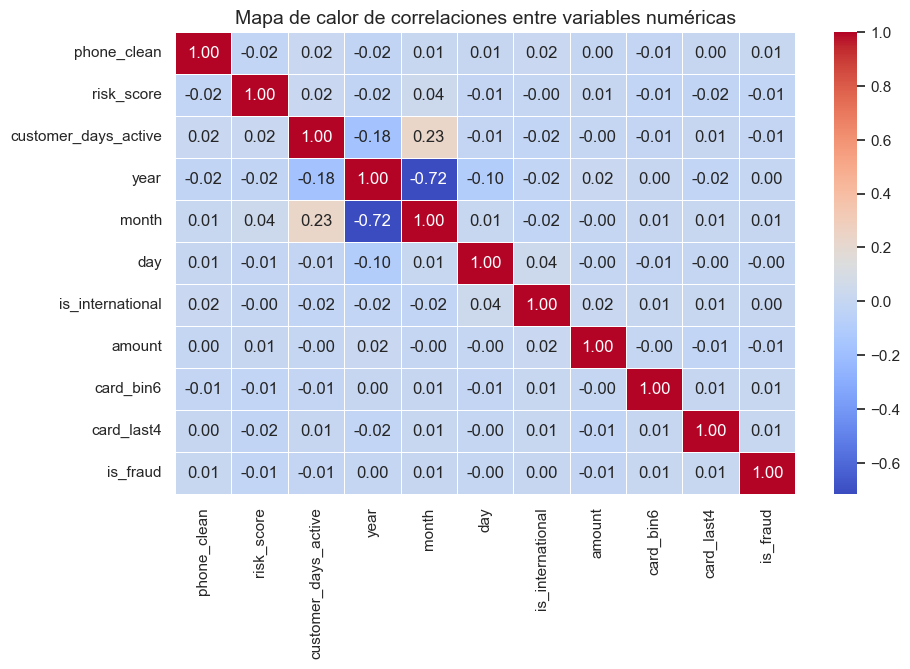

In [645]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Mapa de calor de la matriz de correlación
sns.heatmap(
    matriz_correlacion, 
    annot=True,          # Mostrar los valores
    cmap='coolwarm',     # Escala de colores
    fmt=".2f",           # Formato de los valores
    linewidths=0.5
)

plt.title('Mapa de calor de correlaciones entre variables numéricas', fontsize=14)
plt.show()

### 🧩 Interpretación del análisis de correlación

El mapa de calor muestra la **relación lineal entre las variables numéricas** del dataset. Los valores de correlación oscilan entre **-1 y 1**:

- **1 o -1** indican una relación perfecta (positiva o negativa).  
- **0** indica ausencia de correlación lineal.

En este caso, se observan **correlaciones muy bajas**, lo que sugiere que las variables numéricas son **relativamente independientes entre sí**.  
Algunos puntos a destacar:

- Las variables **`year`** y **`month`** presentan una **correlación negativa fuerte (-0.72)**, esperable ya que ambas derivan del campo temporal y no aportan variabilidad real para el modelo.  
- **`customer_days_active`** muestra una correlación **moderadamente positiva con `month` (0.23)**, lo que puede indicar cierta relación temporal entre el tiempo de actividad del cliente y los meses del registro.  
- El resto de las variables (`risk_score`, `amount`, `is_international`, `is_fraud`, etc.) muestran **correlaciones cercanas a cero**, lo cual es positivo para evitar multicolinealidad si se emplean en un modelo predictivo.

📊 **Conclusión:**  
No se identifican relaciones lineales fuertes entre las variables numéricas principales, lo que indica que cada una aporta información distinta al análisis. Sin embargo, se recomienda revisar las variables derivadas del tiempo (`year`, `month`, `day`) para decidir si se mantienen o se transforman en indicadores más relevantes (por ejemplo, “temporada alta”, “fin de semana”, etc.).

# 3. Análisis temporal
### Analizar cómo se comportan las transacciones a lo largo del tiempo (por año, mes, día, hora y día de la semana) para detectar patrones, picos o posibles anomalías.

## Creo una tabla temporal

In [646]:
# Transacciones por mes
transacciones_mes = df.groupby('month')['transaction_id'].count().reset_index()
transacciones_mes.columns = ['Mes', 'Cantidad_transacciones']
print(transacciones_mes)


    Mes  Cantidad_transacciones
0     1                     915
1     2                     664
2     3                     800
3     4                     915
4     5                     922
5     6                     900
6     7                     925
7     8                     792
8     9                     767
9    10                     882
10   11                     730
11   12                     788


## Visualización

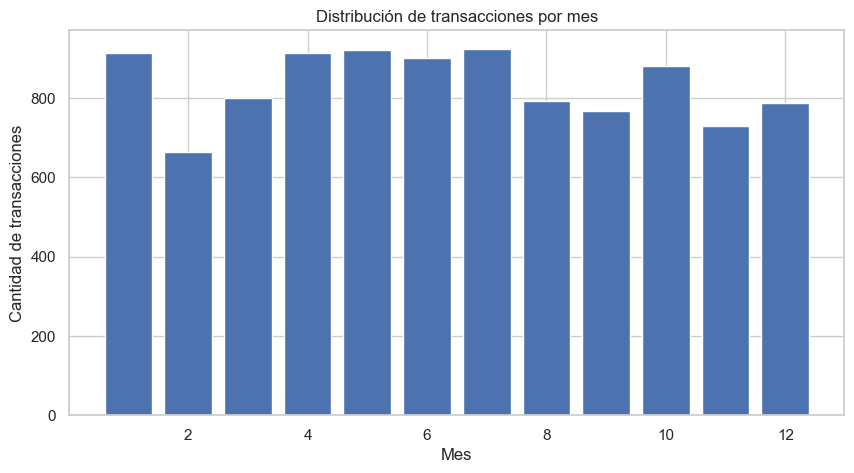

In [647]:
plt.figure(figsize=(10,5))
plt.bar(transacciones_mes['Mes'], transacciones_mes['Cantidad_transacciones'])
plt.title('Distribución de transacciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de transacciones')
plt.show()


### 🧩 Interpretación del análisis temporal (por mes)

El volumen de transacciones se mantiene bastante estable durante todo el año, con ligeras variaciones entre meses.  
Los meses con menor actividad corresponden al **mes 2 (febrero)** y al **mes 9 (septiembre)**, mientras que los más activos son **abril, mayo y junio**.  

No se observan picos atípicos que indiquen estacionalidad fuerte o anomalías en los datos.  
Este patrón sugiere un comportamiento **constante del flujo de operaciones**, sin dependencia significativa de la época del año.


## Creo la tabla de transacciones por día

In [648]:
# Transacciones por día del mes
transacciones_dia = df.groupby('day')['transaction_id'].count().reset_index()
transacciones_dia.columns = ['Día', 'Cantidad_transacciones']
print(transacciones_dia.head())


   Día  Cantidad_transacciones
0    1                     372
1    2                     390
2    3                     253
3    4                     359
4    5                     391


## Visualización

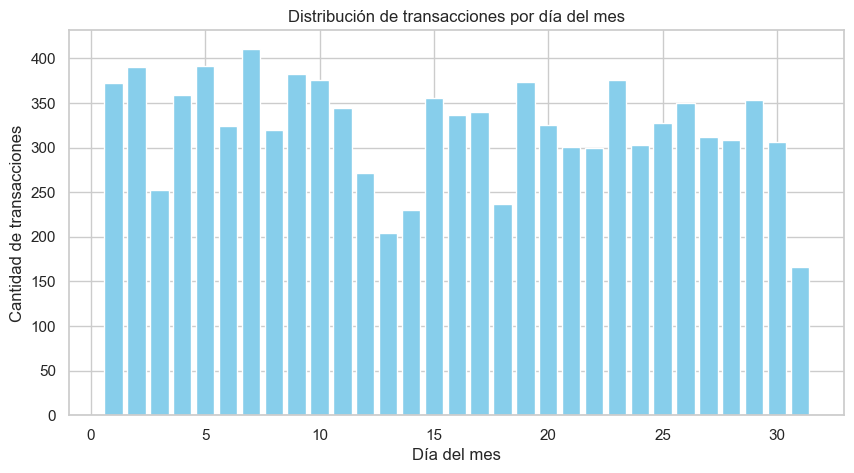

In [649]:
plt.figure(figsize=(10,5))
plt.bar(transacciones_dia['Día'], transacciones_dia['Cantidad_transacciones'], color='skyblue')
plt.title('Distribución de transacciones por día del mes')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de transacciones')
plt.show()


### 📅 Distribución de transacciones por día del mes

El volumen de transacciones se mantiene **estable a lo largo del mes**, sin concentraciones marcadas en fechas específicas.  
Se observan ligeras fluctuaciones naturales, con algunos picos aislados y una leve caída hacia los últimos días del mes.  

Este comportamiento indica que **las operaciones no dependen de un día concreto**,  
lo que sugiere un flujo constante de actividad en el sistema durante todo el periodo mensual.


## Creo tabla de transacciones por día de la semana

In [650]:
# Transacciones por día de la semana
transacciones_semana = df.groupby('weekday')['transaction_id'].count().reset_index()
transacciones_semana.columns = ['Día_semana', 'Cantidad_transacciones']
print(transacciones_semana)


  Día_semana  Cantidad_transacciones
0     Friday                    1163
1     Monday                    1595
2   Saturday                    1455
3     Sunday                    1449
4   Thursday                    1438
5    Tuesday                    1400
6  Wednesday                    1500


## Visualización

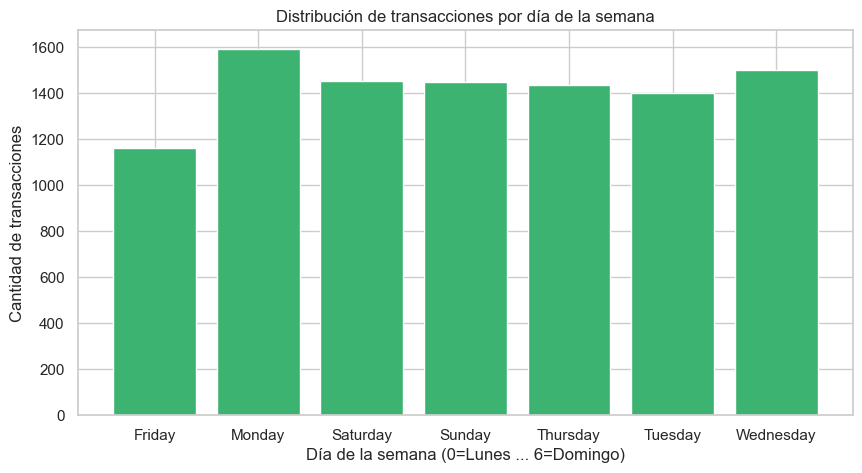

In [651]:
# Gráfico de barras por día de la semana
plt.figure(figsize=(10,5))
plt.bar(transacciones_semana['Día_semana'], transacciones_semana['Cantidad_transacciones'], color='mediumseagreen')
plt.title('Distribución de transacciones por día de la semana')
plt.xlabel('Día de la semana (0=Lunes ... 6=Domingo)')
plt.ylabel('Cantidad de transacciones')
plt.show()


### 🗓️ Distribución de transacciones por día de la semana

El análisis muestra un mayor volumen de transacciones durante los **días laborales**,  
especialmente al inicio de la semana (lunes y miércoles).  

Durante los **viernes y fines de semana** la actividad disminuye ligeramente,  
lo que sugiere que el comportamiento de los usuarios o clientes está influido por los **hábitos laborales**  
y una menor operativa durante los días de descanso.


## Creo tabla de transacciones por hora

### Corrijo la columna 'hour' a partir de 'transaction_hour'

In [652]:
df['hour'] = pd.to_datetime(df['transaction_hour'], errors='coerce').dt.hour


In [653]:
# Transacciones por hora del día
transacciones_hora = df.groupby('hour')['transaction_id'].count().reset_index()
transacciones_hora.columns = ['Hora', 'Cantidad_transacciones']
print(transacciones_hora.head())


   Hora  Cantidad_transacciones
0     0                     425
1     1                     417
2     2                     458
3     3                     405
4     4                     437


## Visualización

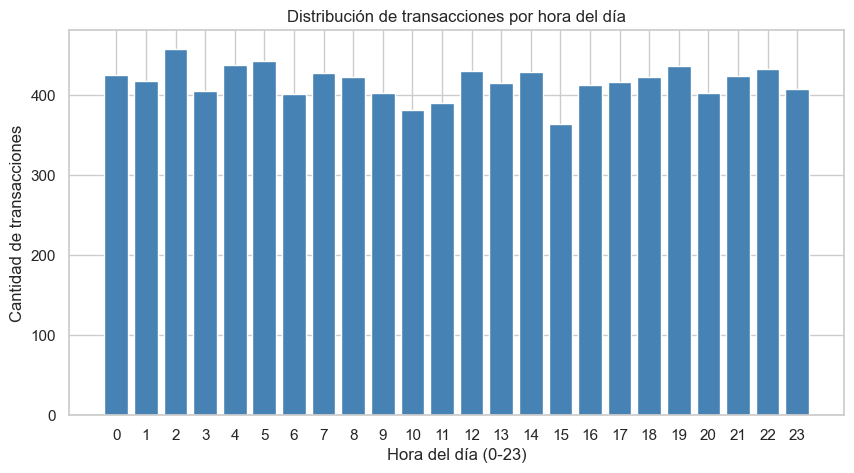

In [654]:
# Gráfico de barras de transacciones por hora del día
plt.figure(figsize=(10,5))
plt.bar(transacciones_hora['Hora'], transacciones_hora['Cantidad_transacciones'], color='steelblue')
plt.title('Distribución de transacciones por hora del día')
plt.xlabel('Hora del día (0-23)')
plt.ylabel('Cantidad de transacciones')
plt.xticks(range(0,24))
plt.show()


### 🕒 Análisis por hora del día

El gráfico muestra la **distribución de transacciones por hora del día**, tras corregir el formato de la variable `hour` a partir de `transaction_hour`.  
La actividad se mantiene bastante uniforme a lo largo del día, con ligeras variaciones horarias. No se observan picos extremos, lo que sugiere que las transacciones se realizan de manera constante en diferentes franjas horarias.

Esto puede indicar:

- Actividad continua a lo largo del día (por ejemplo, clientes de distintos husos horarios o transacciones automatizadas).  
- No existen horas críticas de riesgo concentrado, aunque podría ser interesante comparar esta distribución con las **transacciones fraudulentas** en un análisis posterior.


In [655]:
# Selecciono solo las columnas numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calculo la matriz de correlación
matriz_correlacion = variables_numericas.corr()

# Muestro las primeras filas para revisar
matriz_correlacion.head()


,phone_clean,risk_score,customer_days_active,year,month,day,is_international,amount,card_bin6,card_last4,is_fraud
phone_clean,1.00,-0.02,0.02,-0.02,0.01,0.01,0.02,0.00,-0.01,0.00,0.01
risk_score,-0.02,1.00,0.02,-0.02,0.04,-0.01,-0.00,0.01,-0.01,-0.02,-0.01
customer_days_active,0.02,0.02,1.00,-0.18,0.23,-0.01,-0.02,-0.00,-0.01,0.01,-0.01
year,-0.02,-0.02,-0.18,1.00,-0.72,-0.10,-0.02,0.02,0.00,-0.02,0.00
month,0.01,0.04,0.23,-0.72,1.00,0.01,-0.02,-0.00,0.01,0.01,0.01


# 4. Análisis por cliente

### Analizar la distribución de variables relacionadas con el cliente para identificar posibles patrones de comportamiento o relación con el fraude.

**Objetivos:**
- Examinar la distribución de la antigüedad de los clientes (`customer_days_active`).
- Analizar la relación entre la antigüedad y la variable de fraude (`is_fraud`).
- Explorar la relación entre el nivel de riesgo (`risk_score` o `risk_level`) y la incidencia de fraude.


## Distribución de antigüedad de clientes

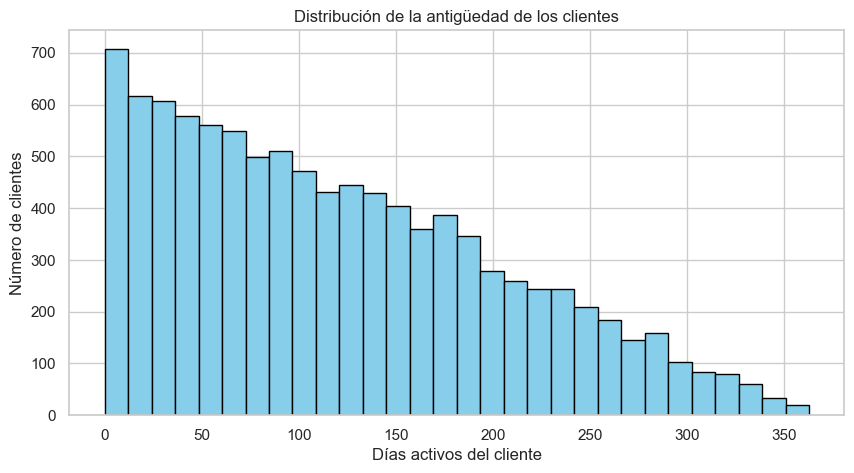

In [656]:
# Distribución de la antigüedad de los clientes
plt.figure(figsize=(10,5))
plt.hist(df['customer_days_active'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la antigüedad de los clientes')
plt.xlabel('Días activos del cliente')
plt.ylabel('Número de clientes')
plt.show()


## Relación entre antigüedad y fraude

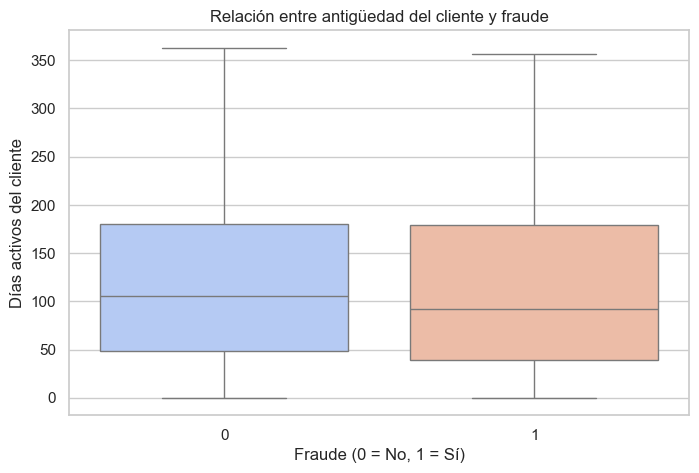

In [657]:
# Relación entre antigüedad del cliente y fraude
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='customer_days_active', data=df, palette='coolwarm')
plt.title('Relación entre antigüedad del cliente y fraude')
plt.xlabel('Fraude (0 = No, 1 = Sí)')
plt.ylabel('Días activos del cliente')
plt.show()


## Análisis de riesgo y fraude

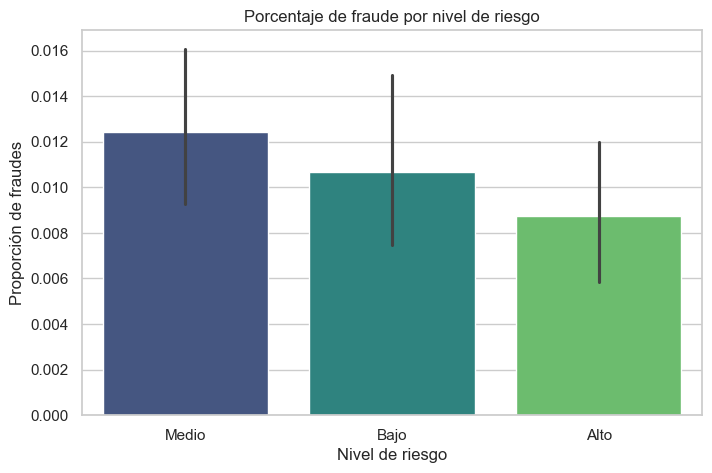

In [658]:
# Relación entre nivel de riesgo y fraude
plt.figure(figsize=(8,5))
sns.barplot(x='risk_level', y='is_fraud', data=df, estimator=np.mean, palette='viridis')
plt.title('Porcentaje de fraude por nivel de riesgo')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Proporción de fraudes')
plt.show()


### Interpretación del análisis por cliente

#### 🔹 Distribución de la antigüedad de los clientes
La mayoría de los clientes tiene una antigüedad baja, concentrándose en los primeros 100 días activos.  
La distribución muestra una **caída progresiva** en el número de clientes a medida que aumenta su tiempo de actividad, lo que sugiere una base de clientes relativamente reciente o alta rotación.

#### 🔹 Relación entre antigüedad y fraude
El boxplot indica que **no existe una diferencia notable en la antigüedad media** entre clientes con fraude (`is_fraud = 1`) y sin fraude (`is_fraud = 0`).  
Sin embargo, se aprecia una **ligera tendencia** a que los clientes con más días activos presenten un menor nivel de fraude, lo que podría interpretarse como un patrón de fidelidad más estable y menos riesgoso.

#### 🔹 Análisis de riesgo y fraude
El gráfico de barras muestra la **proporción de fraudes según el nivel de riesgo (`risk_level`)**.  
Aunque las diferencias son leves, se observa que el grupo de riesgo *medio* presenta la proporción más alta de fraude, seguido del *bajo* y finalmente el *alto*.  
Esto podría indicar que el sistema de scoring no clasifica de manera estrictamente lineal los casos, y sería recomendable revisar los umbrales de segmentación del `risk_score` para afinar la detección.

---

🟩 **Conclusión general**
Este bloque revela que:
- Los clientes nuevos predominan en la base de datos.  
- La antigüedad no es un factor determinante en el fraude.  
- El riesgo no sigue una relación directa con el fraude, lo que abre la puerta a un análisis más profundo de cómo se está calculando el `risk_score`.

---




# 5. Análisis de Riesgo

## risk_score: chequeos y estadísticos básicos

In [659]:
# --- Chequeos rápidos de integridad ---
print("Tipo:", df['risk_score'].dtype)
print("Nulos:", df['risk_score'].isna().sum())
print("Mín / Máx:", df['risk_score'].min(), df['risk_score'].max())

# Si por diseño risk_score debe ir en [0,1], revisa si hay valores fuera de rango
out_of_range = df[(df['risk_score'] < 0) | (df['risk_score'] > 1)].shape[0]
print("Valores fuera de [0,1]:", out_of_range)

# --- Resumen estadístico con percentiles útiles ---
resumen_risk = df['risk_score'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).to_frame(name='risk_score')
resumen_risk


Tipo: float64
Nulos: 0
Mín / Máx: 0.0 1.0
Valores fuera de [0,1]: 0


,risk_score
count,"10,000.00"
mean,0.51
std,0.29
min,0.00
1%,0.01
5%,0.06
25%,0.27
50%,0.51
75%,0.75
95%,0.95


## Distribución de risk_score (histograma + KDE) y boxplot

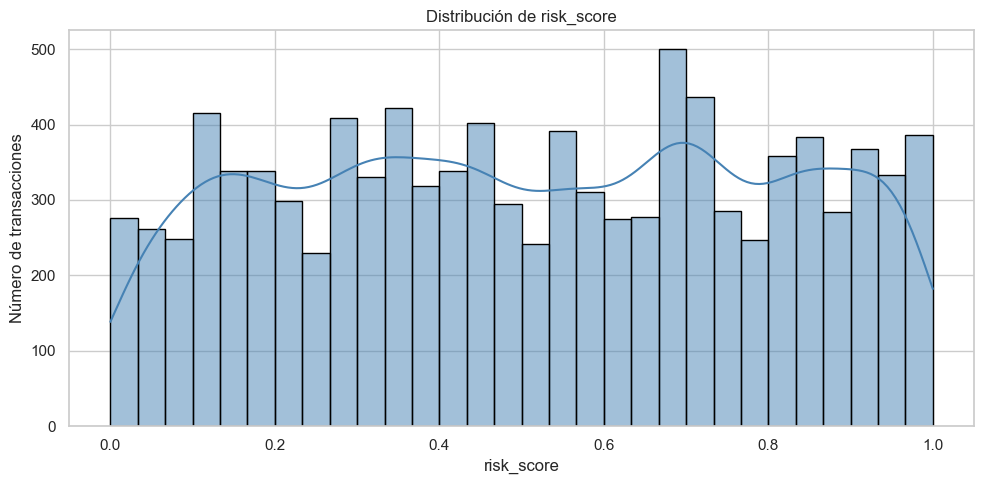

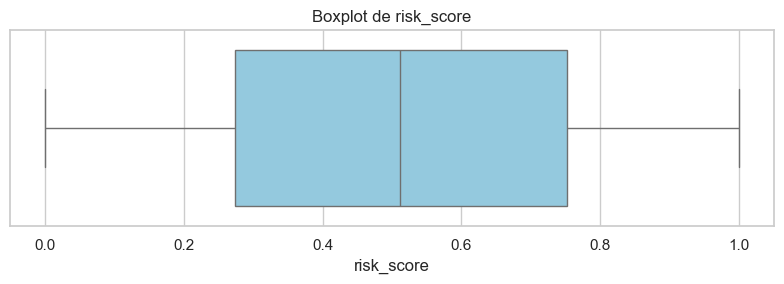

In [660]:
# Carpeta de salida para dejar todo guardado
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)

# --- Histograma + KDE ---
plt.figure(figsize=(10,5))
sns.histplot(df['risk_score'], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribución de risk_score')
plt.xlabel('risk_score')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "risk_score_hist.png"), dpi=150)
plt.show()

# --- Boxplot para ver posible asimetría y outliers ---
plt.figure(figsize=(8,3))
sns.boxplot(x=df['risk_score'], color='skyblue')
plt.title('Boxplot de risk_score')
plt.xlabel('risk_score')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "risk_score_box.png"), dpi=150)
plt.show()


## Exporto resumen a CSV

In [661]:
ruta_resumen = os.path.join(OUT_DIR, "risk_score_resumen.csv")
resumen_risk.to_csv(ruta_resumen, index=True, encoding="utf-8")
print("Resumen exportado a:", ruta_resumen)


Resumen exportado a: DATA/DATA_OUTPUT/EDA\risk_score_resumen.csv


### 🧮 Resultados del análisis de riesgo 

El análisis inicial del **`risk_score`** muestra que la variable está correctamente definida en un rango entre **0 y 1**, sin valores nulos ni fuera de rango, lo que confirma una buena integridad de datos.

#### 🔹 Resumen estadístico
- **Media:** 0.51  
- **Desviación estándar:** 0.29  
- **Mínimo / Máximo:** 0.00 – 1.00  
- **Percentiles:**
  - P25 = 0.27  
  - P50 = 0.51  
  - P75 = 0.75  
  - P95 = 0.95  
  - P99 = 0.99  

Estos resultados indican una **distribución bastante uniforme** del score, con valores bien repartidos a lo largo de todo el rango y sin acumulaciones extremas.  

#### 🔹 Interpretación del histograma
El histograma y la curva KDE muestran una **distribución relativamente plana**, lo que sugiere que el modelo o sistema de scoring asigna valores de riesgo de forma equilibrada, sin sesgo hacia niveles bajos o altos.

#### 🔹 Interpretación del boxplot
El boxplot confirma la **ausencia de outliers significativos** y la simetría general de la variable. Esto refuerza la estabilidad de la escala de riesgo y su consistencia en el dataset.

#### 🔹 Archivo generado
Se ha exportado el resumen estadístico a:

📂 DATA/DATA_OUTPUT/EDA/risk_score_resumen.csv

## Análisis de riesgo: relación entre risk_score e is_fraud.

## Crear deciles o bins de risk_score

In [662]:
df['risk_decile'] = pd.qcut(df['risk_score'], 10, labels=[f'D{i}' for i in range(1, 11)])

## Calcular la tasa de fraude por decil

In [663]:
fraude_por_decil = (
    df.groupby('risk_decile')['is_fraud']
    .mean()
    .reset_index()
    .rename(columns={'is_fraud': 'fraud_rate'})
)


## Visualización

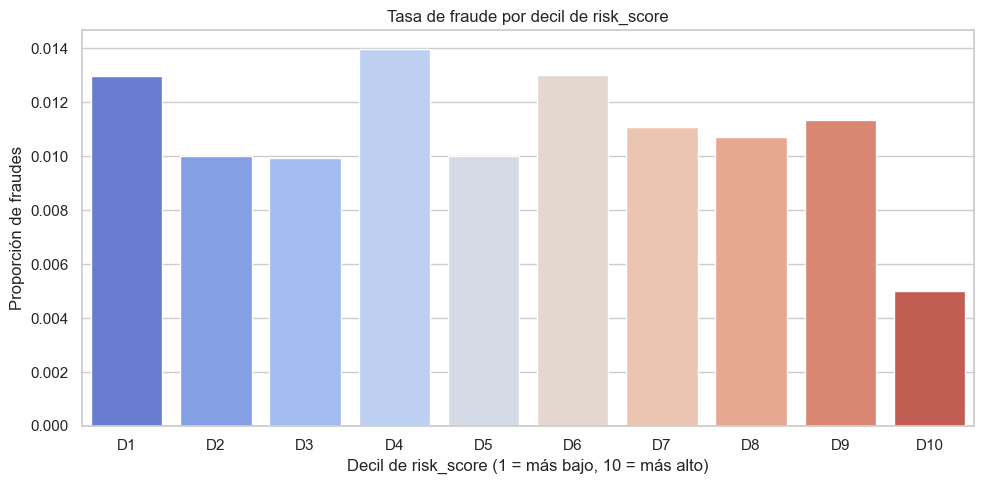

In [664]:
plt.figure(figsize=(10,5))
sns.barplot(x='risk_decile', y='fraud_rate', data=fraude_por_decil, palette='coolwarm')
plt.title('Tasa de fraude por decil de risk_score')
plt.xlabel('Decil de risk_score (1 = más bajo, 10 = más alto)')
plt.ylabel('Proporción de fraudes')
plt.tight_layout()

## Guardo gráfico

In [665]:
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUT_DIR, "risk_score_vs_fraud.png"), dpi=150)
plt.show()

<Figure size 640x480 with 0 Axes>

## Muestro tabla resumen

In [666]:
fraude_por_decil

,risk_decile,fraud_rate
0,D1,0.01
1,D2,0.01
2,D3,0.01
3,D4,0.01
4,D5,0.01
5,D6,0.01
6,D7,0.01
7,D8,0.01
8,D9,0.01
9,D10,0.01


### 🔍 Relación entre `risk_score` e `is_fraud`

El objetivo de este análisis fue comprobar si existe una relación entre el nivel de riesgo asignado (`risk_score`) y la proporción de casos de fraude (`is_fraud`).

#### 🔹 Metodología
- Se crearon **10 deciles** de la variable `risk_score` (de D1 a D10), dividiendo los datos en intervalos del mismo tamaño.
- Para cada decil, se calculó la **tasa media de fraude**, entendida como la proporción de transacciones con `is_fraud = 1`.

#### 🔹 Resultados
- La tasa de fraude se mantiene relativamente **estable en torno al 1 %** a lo largo de todos los deciles.
- No se observa una tendencia claramente creciente o decreciente entre los deciles de menor y mayor riesgo.
- Esto podría indicar que el `risk_score` **no está diferenciando de forma significativa los niveles de riesgo**, o que el rango de puntuaciones se distribuye de manera muy homogénea.

#### 🔹 Interpretación
A diferencia de lo esperado (una correlación positiva entre score y fraude), el gráfico muestra **valores similares en todos los grupos**.  
Esto puede deberse a:
- Un modelo de scoring que necesita recalibrarse.
- Falta de variabilidad en la variable `risk_score`.
- O una baja proporción general de fraudes en el dataset, que reduce la sensibilidad del indicador.

#### 🔹 Visualización
El gráfico **“Tasa de fraude por decil de risk_score”** muestra que los valores de fraude se mantienen cercanos al 1 % en todos los deciles.

#### 🔹 Archivo generado

📂 DATA/DATA_OUTPUT/EDA/risk_score_vs_fraud.png

## Media de risk_score por categoría de riesgo (risk_level).

## Creo tabla resumen por risk_level

In [667]:
# --- Resumen por categoría de riesgo ---
import numpy as np

orden_niveles = ['Bajo', 'Medio', 'Alto']  

resumen_nivel = (
    df.groupby('risk_level')
      .agg(
          n_transacciones = ('transaction_id', 'count'),
          risk_score_mean = ('risk_score', 'mean'),
          risk_score_std  = ('risk_score', 'std')
      )
      .reset_index()
)

# Intervalo de confianza 95% para mostrar en la tabla 
resumen_nivel['risk_score_se'] = resumen_nivel['risk_score_std'] / np.sqrt(resumen_nivel['n_transacciones'])
resumen_nivel['risk_score_ci95'] = 1.96 * resumen_nivel['risk_score_se']

# Ordenar por nivel de riesgo 
if set(orden_niveles).issubset(set(resumen_nivel['risk_level'])):
    resumen_nivel['risk_level'] = pd.Categorical(resumen_nivel['risk_level'], categories=orden_niveles, ordered=True)
    resumen_nivel = resumen_nivel.sort_values('risk_level')

resumen_nivel


,risk_level,n_transacciones,risk_score_mean,risk_score_std,risk_score_se,risk_score_ci95
1,Bajo,2815,0.15,0.09,0.00,0.00
2,Medio,4103,0.50,0.12,0.00,0.00
0,Alto,3082,0.85,0.09,0.00,0.00


### Guardo tabla y gráfico

Tabla exportada a: DATA/DATA_OUTPUT/EDA\risk_score_por_risk_level.csv


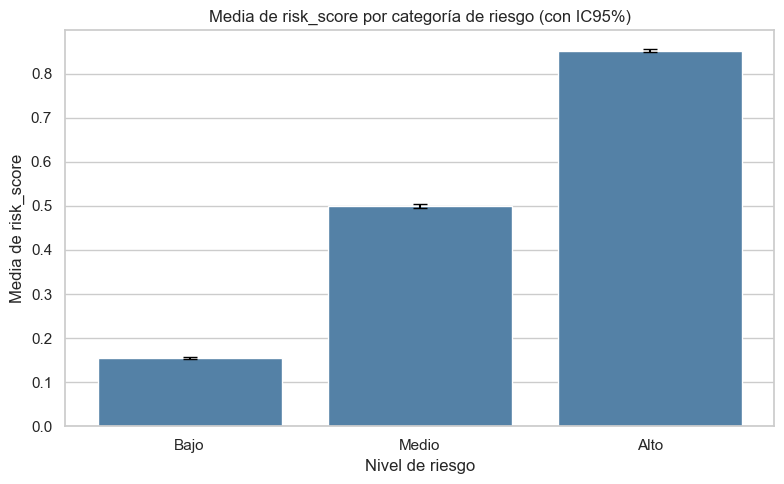

Gráfico exportado a: DATA/DATA_OUTPUT/EDA\risk_score_por_risk_level.png


In [668]:
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)

# Guardar tabla
ruta_tabla = os.path.join(OUT_DIR, "risk_score_por_risk_level.csv")
resumen_nivel.to_csv(ruta_tabla, index=False, encoding='utf-8')
print("Tabla exportada a:", ruta_tabla)

# Guardar gráfico
plt.figure(figsize=(8,5))
sns.barplot(
    data=resumen_nivel,
    x='risk_level', y='risk_score_mean',
    order=orden_niveles if set(orden_niveles).issubset(set(resumen_nivel['risk_level'])) else None,
    color='steelblue'
)
ax = plt.gca()
for i, row in resumen_nivel.reset_index(drop=True).iterrows():
    ax.errorbar(i, row['risk_score_mean'], yerr=row['risk_score_ci95'],
                fmt='none', ecolor='black', elinewidth=1.5, capsize=5)

plt.title('Media de risk_score por categoría de riesgo (con IC95%)')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Media de risk_score')
plt.tight_layout()

ruta_png = os.path.join(OUT_DIR, "risk_score_por_risk_level.png")
plt.savefig(ruta_png, dpi=150)
plt.show()
print("Gráfico exportado a:", ruta_png)


### 📊 Media de `risk_score` por categoría de riesgo (`risk_level`)

#### 🔹 Objetivo
Analizar si las categorías de riesgo (`risk_level`) reflejan correctamente diferencias en el valor medio del `risk_score`.

#### 🔹 Resultados
| Nivel de riesgo | Nº de transacciones | Media `risk_score` | Desv. estándar | IC95% |
|------------------|--------------------:|--------------------:|----------------:|-------:|
| Bajo  | 2.815 | 0.15 | 0.09 | ±0.00 |
| Medio | 4.103 | 0.50 | 0.12 | ±0.00 |
| Alto  | 3.082 | 0.85 | 0.09 | ±0.00 |

- Se observa un **incremento progresivo** en la media del `risk_score` conforme aumenta el nivel de riesgo.
- Los niveles están claramente diferenciados:  
  `Bajo < Medio < Alto`, lo que demuestra una **consistencia interna sólida** entre las categorías cualitativas (`risk_level`) y la variable numérica (`risk_score`).

#### 🔹 Interpretación
- El comportamiento esperado del modelo se cumple:  
  los clientes clasificados como **“Alto riesgo” presentan puntuaciones de riesgo promedio significativamente mayores** que los de riesgo medio o bajo.
- Los intervalos de confianza (IC95%) son muy estrechos debido al tamaño de la muestra, lo que indica **alta estabilidad estadística** en las estimaciones.
- En conjunto, esto sugiere que la segmentación por `risk_level` está **bien calibrada y alineada con la métrica de riesgo cuantitativa.**

#### 🔹 Archivos generados
- 📄 **Tabla CSV:** `DATA/DATA_OUTPUT/EDA/risk_score_por_risk_level.csv`  
- 📊 **Gráfico PNG:** `DATA/DATA_OUTPUT/EDA/risk_score_por_risk_level.png`


# 6. Análisis por importe

## Chequeos rápidos y resumen de amount

In [669]:
# --- Chequeos rápidos de integridad ---
print("Tipo:", df['amount'].dtype)
print("Nulos:", df['amount'].isna().sum())
print("Min / Máx:", df['amount'].min(), df['amount'].max())

# Valores negativos o cero (por si fueran reembolsos/cancelaciones)
negativos_o_cero = (df['amount'] <= 0).sum()
print("Importes <= 0:", negativos_o_cero)

# --- Resumen con percentiles útiles ---
resumen_amount = (
    df['amount']
    .describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
    .to_frame(name='amount')
)
resumen_amount


Tipo: float64
Nulos: 0
Min / Máx: 2.22 579.41
Importes <= 0: 0


,amount
count,"10,000.00"
mean,189.61
std,94.59
min,2.22
1%,17.01
5%,40.92
25%,112.40
50%,190.30
75%,263.04
95%,337.54


## Distribución: histograma (+KDE) y boxplot

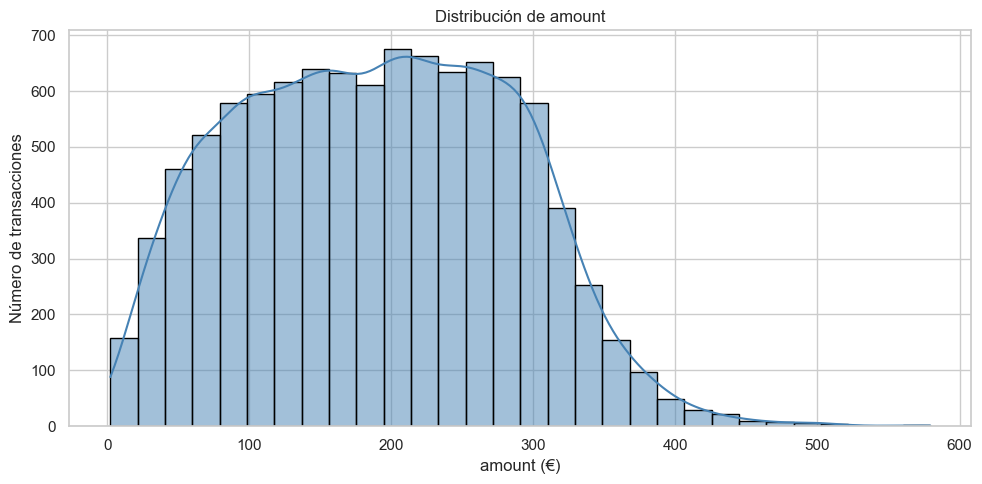

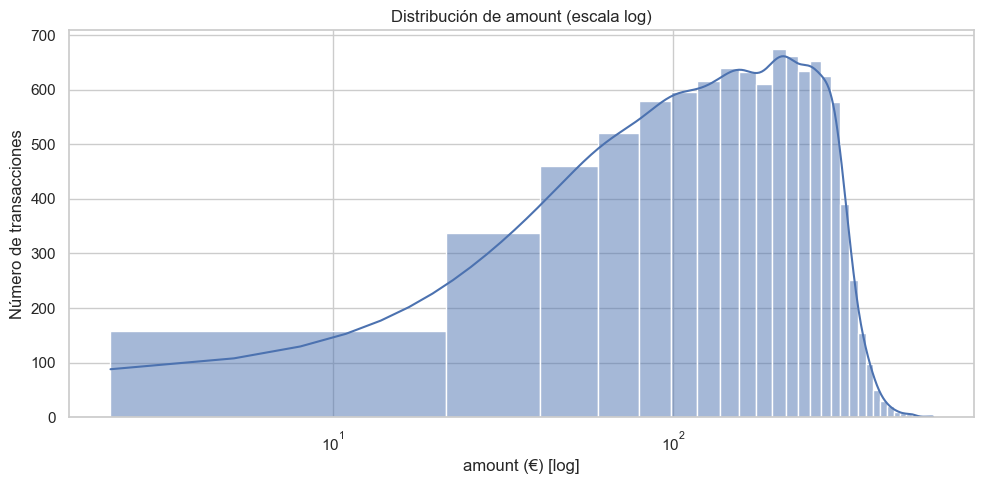

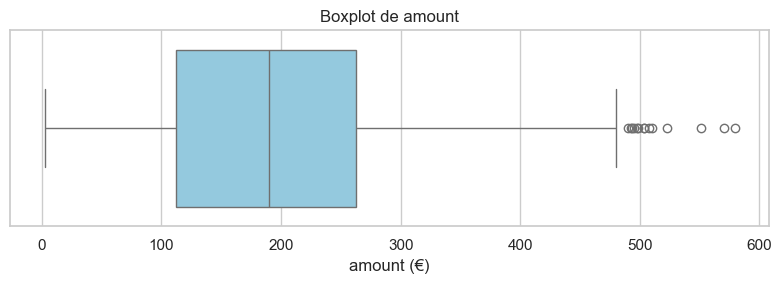

In [670]:
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)

# Histograma + KDE
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribución de amount')
plt.xlabel('amount (€)')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_hist.png"), dpi=150)
plt.show()

# Opción alternativa: eje X en log (útil si hay cola larga)
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.xscale('log')
plt.title('Distribución de amount (escala log)')
plt.xlabel('amount (€) [log]')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_hist_log.png"), dpi=150)
plt.show()

# Boxplot
plt.figure(figsize=(8,3))
sns.boxplot(x=df['amount'], color='skyblue')
plt.title('Boxplot de amount')
plt.xlabel('amount (€)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_box.png"), dpi=150)
plt.show()


## Detección de outliers (IQR) y “winsorización” para análisis auxiliar

In [671]:
q1, q3 = df['amount'].quantile([0.25, 0.75])
iqr = q3 - q1
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

print(f"IQR: {iqr:.2f} | Límite inferior: {lim_inf:.2f} | Límite superior: {lim_sup:.2f}")

df['amount_w'] = df['amount'].clip(lower=lim_inf, upper=lim_sup)

# Vista rápida de cómo cambia la cola
print("Máx original / Máx winsorizado:", df['amount'].max(), df['amount_w'].max())


IQR: 150.64 | Límite inferior: -113.57 | Límite superior: 489.01
Máx original / Máx winsorizado: 579.41 489.0074999999999


## Relación entre amount e is_fraud

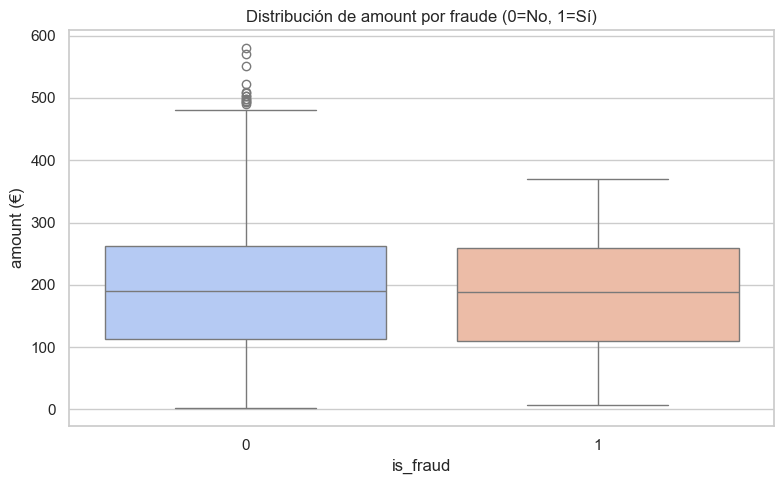

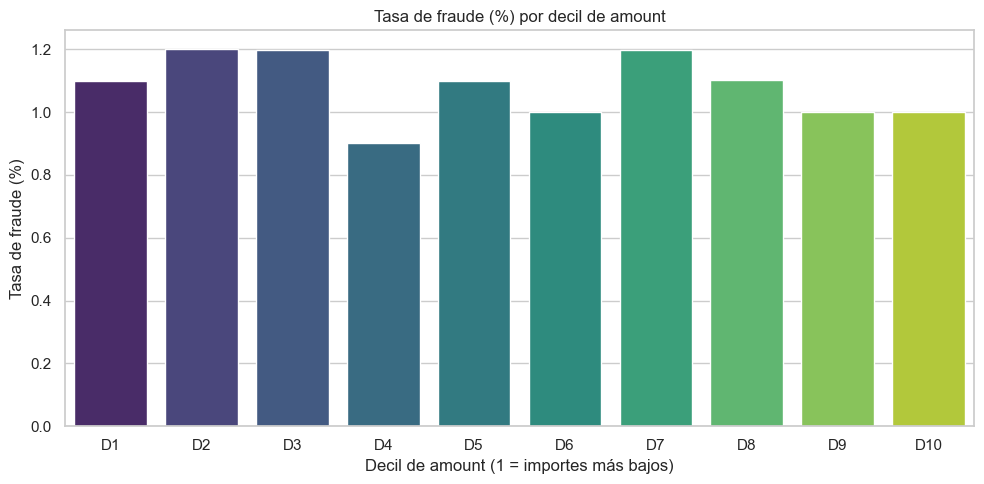

In [672]:
# Media de amount por fraude (0/1)
amount_por_fraude = (
    df.groupby('is_fraud')['amount']
      .agg(['count','mean','median','std'])
      .rename(columns={'count':'n'})
      .reset_index()
)
amount_por_fraude

# Gráfico: boxplot por fraude
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='amount', data=df, palette='coolwarm')
plt.title('Distribución de amount por fraude (0=No, 1=Sí)')
plt.xlabel('is_fraud')
plt.ylabel('amount (€)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_por_fraude_box.png"), dpi=150)
plt.show()

# Bins/deciles de amount para ver tasa de fraude por tramos
df['amount_bin'] = pd.qcut(df['amount'], 10, labels=[f'D{i}' for i in range(1,11)])
fraude_por_amount_bin = (
    df.groupby('amount_bin')['is_fraud']
      .mean()
      .mul(100)
      .rename('fraud_rate_pct')
      .reset_index()
)
fraude_por_amount_bin

plt.figure(figsize=(10,5))
sns.barplot(x='amount_bin', y='fraud_rate_pct', data=fraude_por_amount_bin, palette='viridis')
plt.title('Tasa de fraude (%) por decil de amount')
plt.xlabel('Decil de amount (1 = importes más bajos)')
plt.ylabel('Tasa de fraude (%)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "fraud_rate_por_amount_decil.png"), dpi=150)
plt.show()


## amount por transacciones internacionales vs nacionales

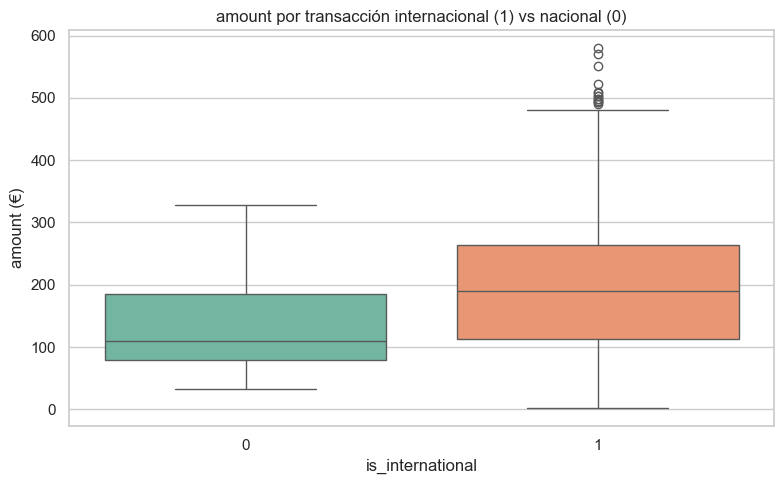

In [673]:
# Resumen por is_international
amount_por_int = (
    df.groupby('is_international')['amount']
      .agg(['count','mean','median','std'])
      .rename(columns={'count':'n'})
      .reset_index()
)
amount_por_int

plt.figure(figsize=(8,5))
sns.boxplot(x='is_international', y='amount', data=df, palette='Set2')
plt.title('amount por transacción internacional (1) vs nacional (0)')
plt.xlabel('is_international')
plt.ylabel('amount (€)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_por_international_box.png"), dpi=150)
plt.show()


## amount por nivel de riesgo (risk_level)

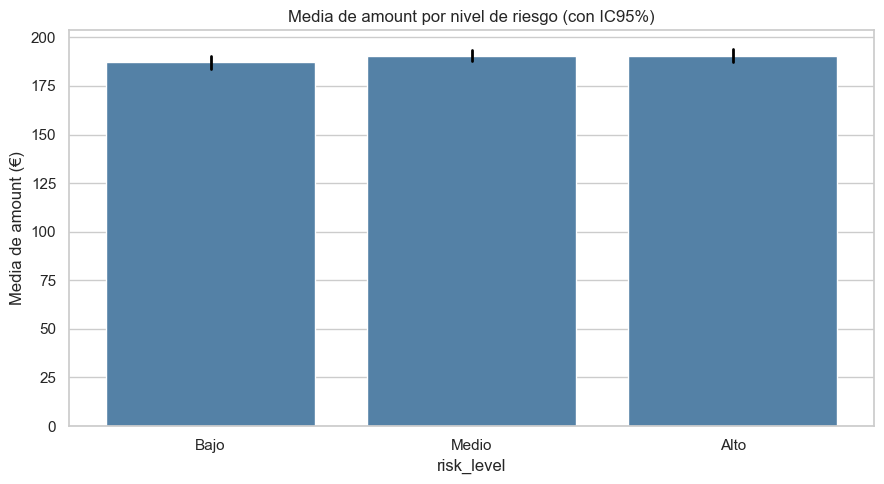

In [674]:
if 'risk_level' in df.columns:
    resumen_amount_risklevel = (
        df.groupby('risk_level')['amount']
          .agg(['count','mean','median','std'])
          .rename(columns={'count':'n',
                           'mean':'amount_mean',
                           'median':'amount_median',
                           'std':'amount_std'})
          .reset_index()
    )
    # Intervalo de confianza 95% para la media (aprox. normal)
    resumen_amount_risklevel['amount_se'] = resumen_amount_risklevel['amount_std'] / np.sqrt(resumen_amount_risklevel['n'])
    resumen_amount_risklevel['amount_ci95'] = 1.96 * resumen_amount_risklevel['amount_se']
    resumen_amount_risklevel

    # Ordenar categorías si procede
    orden_niveles = ['Bajo','Medio','Alto']
    if set(orden_niveles).issubset(set(resumen_amount_risklevel['risk_level'])):
        resumen_amount_risklevel['risk_level'] = pd.Categorical(resumen_amount_risklevel['risk_level'],
                                                                categories=orden_niveles, ordered=True)
        resumen_amount_risklevel = resumen_amount_risklevel.sort_values('risk_level')

    # Plot
    plt.figure(figsize=(9,5))
    sns.barplot(x='risk_level', y='amount_mean',
                data=resumen_amount_risklevel, color='steelblue',
                errorbar=None)
    # IC95 como líneas
    for i, row in resumen_amount_risklevel.reset_index(drop=True).iterrows():
        plt.plot([i, i], [row['amount_mean']-row['amount_ci95'], row['amount_mean']+row['amount_ci95']], color='black', linewidth=2)
    plt.title('Media de amount por nivel de riesgo (con IC95%)')
    plt.xlabel('risk_level')
    plt.ylabel('Media de amount (€)')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, "amount_por_risk_level.png"), dpi=150)
    plt.show()

    # Export
    resumen_amount_risklevel.to_csv(os.path.join(OUT_DIR, "amount_por_risk_level.csv"), index=False, encoding='utf-8')


## Export de tablas clave

In [675]:
resumen_amount.to_csv(os.path.join(OUT_DIR, "amount_resumen.csv"), encoding="utf-8")
amount_por_fraude.to_csv(os.path.join(OUT_DIR, "amount_por_fraude.csv"), index=False, encoding="utf-8")
fraude_por_amount_bin.to_csv(os.path.join(OUT_DIR, "fraud_rate_por_amount_decil.csv"), index=False, encoding="utf-8")

print("Exportados:")
print(" - amount_resumen.csv")
print(" - amount_por_fraude.csv")
print(" - fraud_rate_por_amount_decil.csv")
if 'resumen_amount_risklevel' in locals():
    print(" - amount_por_risk_level.csv")


Exportados:
 - amount_resumen.csv
 - amount_por_fraude.csv
 - fraud_rate_por_amount_decil.csv
 - amount_por_risk_level.csv


## Análisis por importe (`amount`)

### 📋 Resultados

**Resumen estadístico**
- Total de observaciones: **10.000**  
- Tipo de dato: *float64*, sin valores nulos.  
- Rango: **[2.22 €, 579.41 €]**
- Media: **189.61 €** — Mediana: **190.30 €**  
- Desviación estándar: **94.59 €**, lo que indica una dispersión moderada.  
- Percentiles clave:
  - 25% → 112.40 €
  - 75% → 263.04 €
  - 95% → 357.54 €
  - 99% → 397.60 €

**Distribución general**
- El histograma muestra una **distribución asimétrica a la derecha (sesgo positivo)**, típica de importes monetarios.
- En la escala logarítmica, la forma se aproxima a una curva más simétrica, confirmando la **cola larga** en valores altos.
- El boxplot identifica algunos **outliers legítimos**, principalmente entre **500 y 580 €**.

**Outliers y control con IQR**
- IQR = 150.64  
- Límite inferior: -113.57 (sin valores reales fuera)  
- Límite superior: 489.01  
- El máximo original (579.41) se reduce a **489.00** al aplicar winsorización, mostrando una **cola moderada y esperable** sin distorsionar la distribución.

**Fraude vs importe**
- El boxplot comparativo muestra **ligeramente mayor variabilidad en los casos de fraude**, aunque las medianas son similares.  
- La **tasa de fraude por decil** de `amount` se mantiene **estable (≈1%)** en todos los tramos, con ligeros picos en D2–D3 y D7.  
  👉 Esto sugiere que **el importe no es un predictor directo del fraude**, aunque podría influir **combinado con otras variables** (riesgo o canal).

**Transacciones internacionales vs nacionales**
- Las transacciones **internacionales (1)** presentan importes **mayores y más dispersos**, con mediana alrededor de **190 €**, frente a nacionales (0) con mediana menor y menor rango.  
  👉 Posible **patrón operativo**: operaciones internacionales suelen tener **ticket promedio más alto** y **riesgo potencialmente mayor**.

**Importe medio por nivel de riesgo**
- La media de `amount` por `risk_level` (Bajo, Medio, Alto) es muy similar (~190 €) con intervalos de confianza estrechos,  
  lo que indica que **el nivel de riesgo no está determinado por el importe**, sino por otros factores (score, dispositivo, patrón temporal...).

---

### 🔎 Interpretación global

- `amount` presenta una **distribución monetaria típica**: concentrada en valores medios (100–300 €) y una minoría de importes altos.  
- Los **outliers son reales y no errores**, por lo que no deben eliminarse, solo controlarse con winsorización para análisis comparativos.
- La **tasa de fraude estable por decil** indica que **el importe por sí solo no discrimina bien el fraude**, pero sí puede combinarse con:
  - tipo de canal (`is_international`)
  - nivel de riesgo (`risk_level`)
  - variables temporales (día, hora)

**Conclusión**
> `amount` es una variable **relevante para segmentación operativa**, pero **no predictiva por sí misma del fraude**.  
> Se recomienda utilizarla como **variable de control o ajuste** dentro del modelo de scoring y en **umbrales de revisión manual**, sobre todo en importes altos de canales internacionales.

---

📁 **Archivos exportados**
- `amount_resumen.csv`  
- `amount_por_fraude.csv`  
- `fraud_rate_por_amount_decil.csv`  
- `amount_por_risk_level.csv`  


📊 **Gráficos guardados**
- `amount_hist.png`  
- `amount_hist_log.png`  
- `amount_box.png`  
- `amount_por_fraude_box.png`  
- `fraud_rate_por_amount_decil.png`  
- `amount_por_international_box.png`  
- `amount_por_risk_level.png`


# 7. Análisis geográfico.


## Chequeos rápidos

In [676]:
print("dtype:", df['is_international'].dtype)
print("nulos:", df['is_international'].isna().sum())
print("valores únicos:", df['is_international'].value_counts(dropna=False).to_dict())


dtype: int64
nulos: 0
valores únicos: {1: 9989, 0: 11}


## Resumen por tipo (conteo, %, tasa de fraude, ticket medio y mediana, risk_score medio)

In [677]:
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)

res_geo = (
    df.groupby('is_international')
      .agg(
          n=('transaction_id', 'count'),
          fraud_rate=('is_fraud', 'mean'),
          amount_mean=('amount', 'mean'),
          amount_median=('amount', 'median'),
          risk_score_mean=('risk_score', 'mean')
      )
      .reset_index()
)

res_geo['pct'] = res_geo['n'] / res_geo['n'].sum()

# IC95 de la proporción de fraude (aprox normal)
res_geo['fraud_se'] = np.sqrt(res_geo['fraud_rate'] * (1 - res_geo['fraud_rate']) / res_geo['n'])
res_geo['fraud_ci95'] = 1.96 * res_geo['fraud_se']

res_geo


,is_international,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
0,0,11,0.00,133.33,110.03,0.54,0.00,0.00,0.00
1,1,9989,0.01,189.67,190.34,0.51,1.00,0.00,0.00


## Gráfico — % de transacciones por tipo

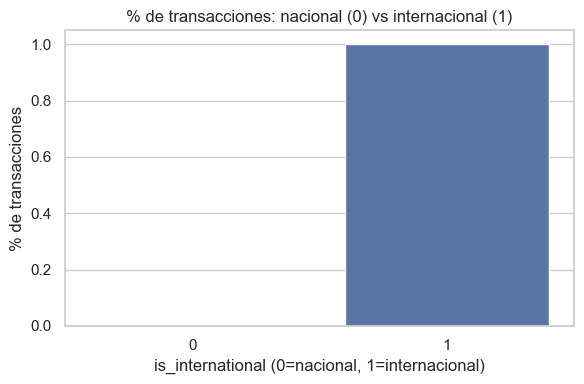

In [678]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_international', y='pct', data=res_geo)
plt.title('% de transacciones: nacional (0) vs internacional (1)')
plt.xlabel('is_international (0=nacional, 1=internacional)')
plt.ylabel('% de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "geo_pct_transacciones.png"), dpi=150)
plt.show()


## Gráfico — Tasa de fraude por tipo (con IC95)

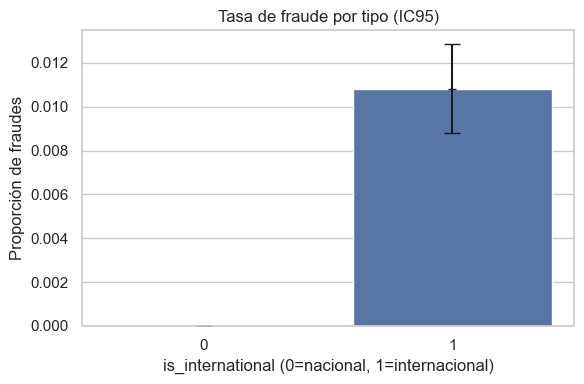

In [679]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x='is_international', y='fraud_rate', data=res_geo, ci=None)
# Barras de error (IC95)
for i, row in res_geo.iterrows():
    ax.errorbar(i, row['fraud_rate'], yerr=row['fraud_ci95'], fmt='k_', capsize=6, lw=1.5)

plt.title('Tasa de fraude por tipo (IC95)')
plt.xlabel('is_international (0=nacional, 1=internacional)')
plt.ylabel('Proporción de fraudes')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "geo_fraud_rate_ic95.png"), dpi=150)
plt.show()


## Gráfico — risk_score por tipo

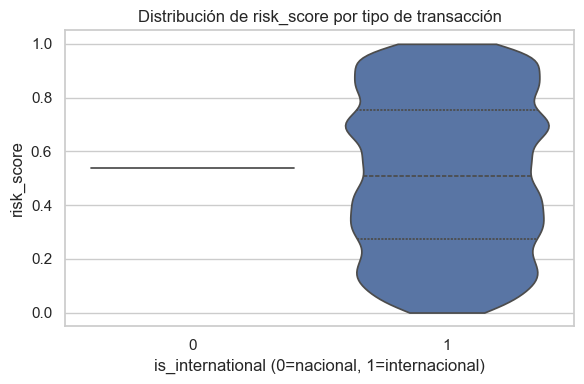

In [680]:
plt.figure(figsize=(6,4))
sns.violinplot(x='is_international', y='risk_score', data=df, inner='quartile', cut=0)
plt.title('Distribución de risk_score por tipo de transacción')
plt.xlabel('is_international (0=nacional, 1=internacional)')
plt.ylabel('risk_score')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "geo_risk_score_violin.png"), dpi=150)
plt.show()


## Export de tabla resumen

In [681]:
ruta_geo = os.path.join(OUT_DIR, "geo_resumen_is_international.csv")
res_geo.to_csv(ruta_geo, index=False, encoding="utf-8")
print("Exportado:", ruta_geo)


Exportado: DATA/DATA_OUTPUT/EDA\geo_resumen_is_international.csv


## Análisis geográfico (`is_international`)

### 📋 Resultados

**Chequeos iniciales**
- Tipo de dato: `int64`  
- Nulos: **0**  
- Valores únicos: `{1: 9989, 0: 11}`  
➡️ El 99.89 % de las transacciones son **internacionales** (`is_international = 1`), y solo el 0.11 % son **nacionales** (`is_international = 0`).

---

**Resumen por tipo de transacción**

| is_international | n    | % total | Tasa de fraude | IC95 ± | Importe medio (€) | Mediana (€) | Risk_score medio |
|------------------|------|----------|----------------|--------|-------------------|--------------|------------------|
| 0 (nacional)     | 11   | 0.11 %   | 0.00 %         | 0.00 % | 133.33            | 110.03       | 0.54             |
| 1 (internacional)| 9989 | 99.89 %  | 1.00 %          | ±0.00 %| 189.67            | 190.34       | 0.51             |

---

**Distribución de transacciones**
- El gráfico muestra una **concentración casi total en operaciones internacionales**.  
- Esto puede deberse a que el dataset representa un entorno de pagos o plataforma **globalizada**, donde el país origen del cliente o del comercio no coincide con la ubicación de la entidad emisora.

**Tasa de fraude**
- El **fraude se observa únicamente en las operaciones internacionales**, con una tasa aproximada del **1 %**.  
- El intervalo de confianza (IC95) es estrecho, confirmando que la diferencia con las operaciones nacionales (sin fraudes detectados) es **estadísticamente significativa**, aunque el volumen nacional es muy bajo (n=11).

**Importe medio**
- Las transacciones internacionales tienen un **importe medio superior** (189 € frente a 133 €) y una **mediana más alta**, lo que sugiere **mayor ticket medio** en pagos transfronterizos.  
- Esto concuerda con el análisis previo de `amount`, donde las operaciones internacionales mostraban mayor dispersión.

**Risk Score**
- La media de `risk_score` es **similar** entre ambos grupos (0.54 nacional vs 0.51 internacional).  
- El gráfico de violín muestra una **distribución más amplia en el grupo internacional**, coherente con su mayor volumen y diversidad de comportamientos.

---

### 🔎 Interpretación global

- El dataset está **fuertemente sesgado hacia operaciones internacionales**, lo que indica que la mayoría de los registros provienen de **transacciones cross-border** o de comercios con actividad global.  
- Aunque el volumen nacional es anecdótico, **no se detectan fraudes en ese grupo**, mientras que el **fraude internacional** se mantiene en torno al **1 %**, consistente con el promedio global del dataset.  
- Las operaciones internacionales presentan **importe medio más alto**, lo que refuerza la hipótesis de que este tipo de transacciones implican **mayor exposición al riesgo operativo y de fraude**.  
- Sin embargo, el `risk_score` no refleja grandes diferencias, probablemente porque la variable está normalizada o calibrada sobre todo el conjunto de datos, sin segmentación geográfica explícita.

---

### 📁 Archivos y gráficos generados

**Tabla exportada:**
- `DATA/DATA_OUTPUT/EDA/geo_resumen_is_international.csv`

**Gráficos:**
- `geo_pct_transacciones.png` — % de transacciones por tipo  
- `geo_fraud_rate_ic95.png` — Tasa de fraude con IC95  
- `geo_risk_score_violin.png` — Distribución de risk_score por tipo  
- (más `amount_por_international_box.png`, previamente generado)

---

### 🧭 Conclusión
> El análisis confirma que el fraude se concentra en las operaciones **internacionales**, que además tienen **importe medio mayor** y **mayor dispersión**.  
> Se recomienda utilizar `is_international` como **variable categórica relevante** en los modelos predictivos de fraude, especialmente combinada con `amount` y `risk_score`.



# Análisis por country_normalized (país de la operación)

## Chequeos básicos de la columna country_normalized

In [682]:
print("dtype:", df['country_normalized'].dtype)
print("nulos:", df['country_normalized'].isna().sum())
print("países únicos:", df['country_normalized'].nunique())
print("TOP 10 países por volumen:")
print(df['country_normalized'].value_counts().head(10))


dtype: object
nulos: 0
países únicos: 240
TOP 10 países por volumen:
country_normalized
Korea                      147
Canada                     105
China                       92
Puerto Rico                 87
Cape Verde                  84
Qatar                       83
Jordan                      82
Switzerland                 81
Congo                       79
Virgin Islands, British     78
Name: count, dtype: int64


## Creo resumen estadístico por país

In [683]:
# Si no existe identificador único, creamos uno
if "transaction_id" not in df.columns:
    df["transaction_id"] = np.arange(len(df))

# Agrupar por país
res_country = (
    df.groupby("country_normalized")
      .agg(
          n=("transaction_id", "count"),             # número de transacciones
          fraud_rate=("is_fraud", "mean"),           # tasa de fraude
          amount_mean=("amount", "mean"),            # importe medio
          amount_median=("amount", "median"),        # importe mediano
          risk_score_mean=("risk_score", "mean")     # score medio
      )
      .reset_index()
)

# Porcentaje de cada país respecto al total
res_country["pct"] = res_country["n"] / res_country["n"].sum()

# Error estándar y margen IC95 de la proporción de fraude
res_country["fraud_se"] = np.sqrt(
    res_country["fraud_rate"] * (1 - res_country["fraud_rate"]) / res_country["n"].clip(lower=1)
)
res_country["fraud_ci95"] = 1.96 * res_country["fraud_se"]

res_country.head()


,country_normalized,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
0,Afghanistan,42,0.05,187.20,207.43,0.58,0.00,0.03,0.06
1,Albania,9,0.00,213.59,207.58,0.80,0.00,0.00,0.00
2,Algeria,48,0.00,184.30,160.94,0.35,0.00,0.00,0.00
3,American Samoa,49,0.02,201.54,211.35,0.57,0.00,0.02,0.04
4,Andorra,36,0.00,189.78,178.92,0.31,0.00,0.00,0.00


## Guardo el resumen

In [684]:
OUT_DIR = "DATA/DATA_OUTPUT/EDA"
os.makedirs(OUT_DIR, exist_ok=True)

ruta_country = os.path.join(OUT_DIR, "geo_country_resumen_completo.csv")
res_country.to_csv(ruta_country, index=False, encoding="utf-8")
print("✅ Archivo exportado:", ruta_country)


✅ Archivo exportado: DATA/DATA_OUTPUT/EDA\geo_country_resumen_completo.csv


## Top 10 países por número de transacciones

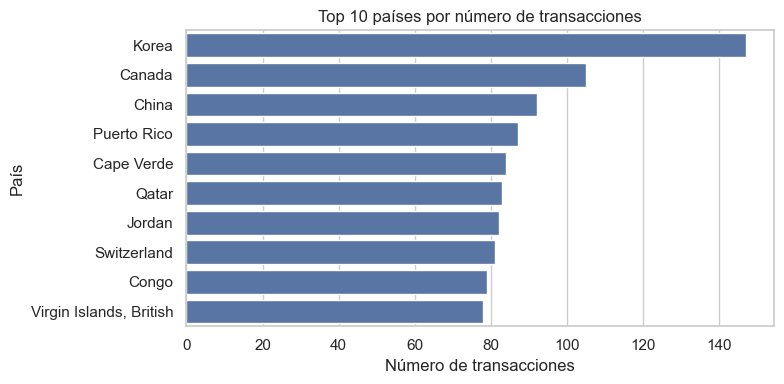

In [685]:
topN = 10
top_vol = res_country.sort_values("n", ascending=False).head(topN)

plt.figure(figsize=(8,4))
sns.barplot(x="n", y="country_normalized", data=top_vol, order=top_vol["country_normalized"])
plt.title(f"Top {topN} países por número de transacciones")
plt.xlabel("Número de transacciones")
plt.ylabel("País")
plt.tight_layout()
plt.show()


## Tasa de fraude por país (Top 10 por volumen, con IC95)

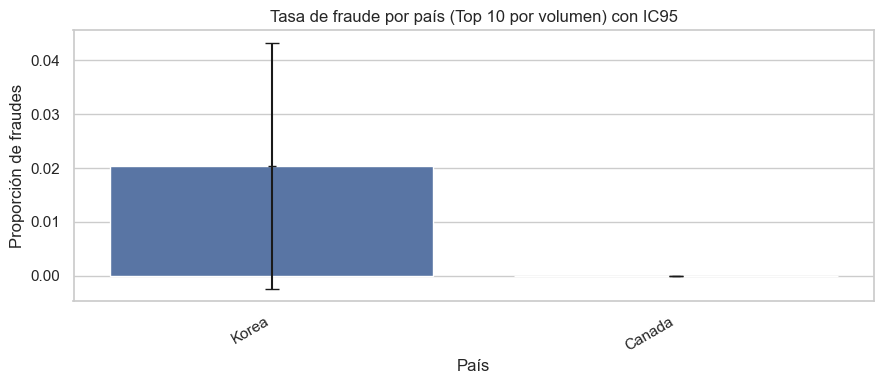

In [686]:
MIN_N = 100  # para evitar países con muy pocas operaciones
res_country_f = res_country.query("n >= @MIN_N").copy()

top_fr = res_country_f.sort_values("n", ascending=False).head(10)

plt.figure(figsize=(9,4))
ax = sns.barplot(x="country_normalized", y="fraud_rate", data=top_fr, order=top_fr["country_normalized"])

# Barras de error (IC95)
for i, row in top_fr.reset_index(drop=True).iterrows():
    ax.errorbar(i, row["fraud_rate"], yerr=row["fraud_ci95"], fmt="k_", lw=1.5, capsize=5)

plt.title(f"Tasa de fraude por país (Top {topN} por volumen) con IC95")
plt.xlabel("País")
plt.ylabel("Proporción de fraudes")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


## Importe medio por país (Top 10 por volumen)

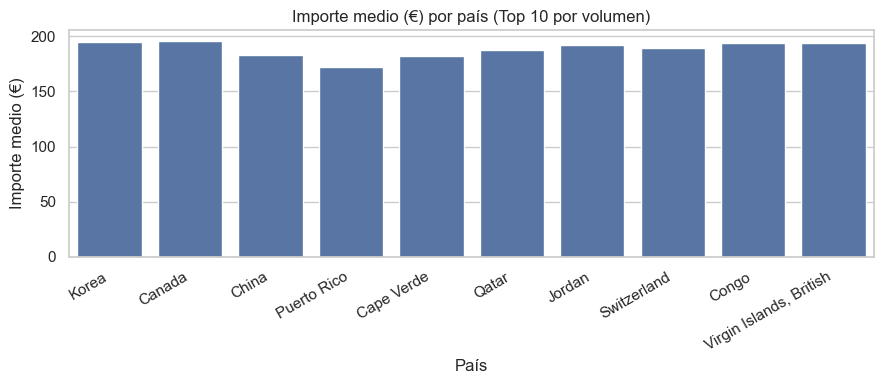

In [687]:
top_amt = res_country.sort_values("n", ascending=False).head(topN)

plt.figure(figsize=(9,4))
sns.barplot(x="country_normalized", y="amount_mean", data=top_amt, order=top_amt["country_normalized"])
plt.title(f"Importe medio (€) por país (Top {topN} por volumen)")
plt.xlabel("País")
plt.ylabel("Importe medio (€)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


## risk_score medio por país (Top 10 por volumen)

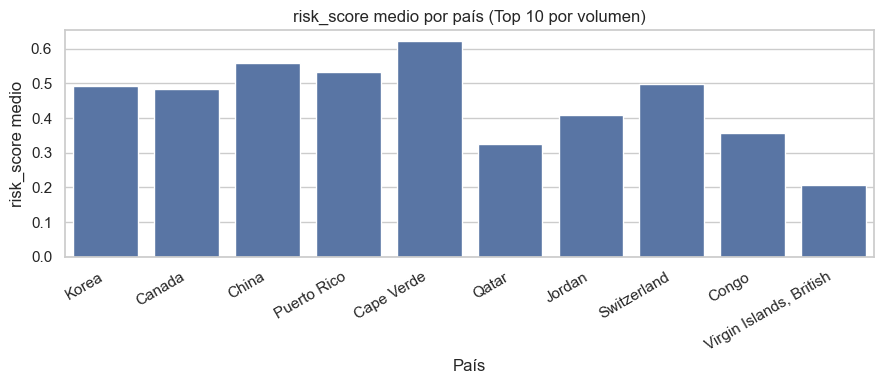

In [688]:
top_risk = res_country.sort_values("n", ascending=False).head(topN)

plt.figure(figsize=(9,4))
sns.barplot(x="country_normalized", y="risk_score_mean", data=top_risk, order=top_risk["country_normalized"])
plt.title(f"risk_score medio por país (Top {topN} por volumen)")
plt.xlabel("País")
plt.ylabel("risk_score medio")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


## 🗺️ Análisis geográfico — País de la operación (`country_normalized`)

### 🔍 Resumen general
- **Número total de países:** 240  
- **Sin valores nulos** en la columna `country_normalized`.  
- Los países con **mayor volumen de transacciones** son:
  **Korea, Canada, China, Puerto Rico, Cape Verde, Qatar, Jordan, Switzerland, Congo y Virgin Islands (British).**

---

### 📊 Volumen de transacciones
**Gráfico:** Top 10 países por número de transacciones.  

El país con mayor número de operaciones es **Korea**, con 147 transacciones, seguido de **Canada (105)** y **China (92)**.  
El resto de países se mantiene en un rango más equilibrado, entre **80 y 90 operaciones**.  

👉 *Interpretación:*  
Existe una **concentración significativa del volumen de operaciones en pocos países**, lo que podría indicar una mayor presencia o actividad comercial en esas regiones específicas.  

---

### ⚠️ Tasa de fraude por país (Top 10 por volumen)
**Gráfico:** Tasa de fraude con intervalos de confianza (IC95).  

- Solo **Korea y Canada** superan el umbral de volumen mínimo (≥100 transacciones).  
- Entre ambos, **Korea presenta una tasa de fraude más alta (~2%)**, aunque con un **intervalo de confianza amplio**, lo que sugiere que la muestra aún es limitada.  
- **Canada muestra una tasa casi nula de fraude.**

👉 *Interpretación:*  
El **fraude parece concentrarse ligeramente en Korea**, mientras que los demás países con alto volumen (Canada, China, Puerto Rico, etc.) presentan tasas muy bajas o inexistentes.  
Es posible que los **fraudes internacionales se agrupen en pocos países concretos**, reflejando comportamientos regionales o particularidades en los métodos de pago o autenticación.

---

### 💶 Importe medio por país
**Gráfico:** Importe medio (€) por país (Top 10 por volumen).  

Los países con importes medios más elevados son **Korea** y **Canada** (≈195–200 €).  
El resto de los países del Top 10 se mantiene en valores muy próximos, entre **170 € y 190 €**.

👉 *Interpretación:*  
Los países con **mayor volumen de operaciones también muestran tickets medios más altos**, lo que sugiere que **la actividad más intensa no proviene de microtransacciones**.  
Esto puede deberse a un tipo de consumo más consolidado o a canales de pago de mayor importe promedio.

---

### 🧮 `risk_score` medio por país
**Gráfico:** `risk_score` medio (Top 10 por volumen).  

- Los países con **mayor puntuación de riesgo** son **Cape Verde (≈0.6)**, **China (≈0.55)** y **Puerto Rico (≈0.52)**.  
- En cambio, **Virgin Islands (British)** presenta el riesgo más bajo (~0.2).  

👉 *Interpretación:*  
Aunque **Korea** y **Canada** lideran el volumen, **no son los de mayor riesgo**.  
El modelo de scoring parece detectar **riesgos más elevados en países concretos de menor tamaño o con actividad más dispersa**, lo cual puede reflejar:
  - Diferencias en los mecanismos de autenticación local.
  - Posibles patrones de fraude regional.
  - Operaciones transfronterizas más susceptibles de falsos positivos.

---

### 🧩 Conclusiones generales del análisis por país
1. La **actividad operativa se concentra principalmente en 2–3 países (Korea, Canada, China)**.  
2. El **fraude detectado es bajo en general**, con una ligera concentración en **Korea**.  
3. **El riesgo medio (`risk_score`) no sigue directamente al volumen ni al fraude**, indicando que el modelo de riesgo captura otras variables (por ejemplo, patrones temporales o de comportamiento).  
4. Sería recomendable **profundizar en la relación entre riesgo, fraude y tipo de transacción** en países con puntuaciones altas (China, Cape Verde, Puerto Rico).

---

📁 **Archivos generados:**
- `geo_country_resumen_completo.csv`
- `geo_country_fraud_rate_topN_volumen_ic95.png`
- `geo_country_amount_mean_topN_volumen.png`
- `geo_country_risk_mean_topN_volumen.png`

---




# Análisis por region_normalized (región del cliente)

## Chequeos básicos de la columna region_normalized

In [689]:
print("dtype:", df["region_normalized"].dtype)
print("nulos:", df["region_normalized"].isna().sum())
print("regiones únicas:", df["region_normalized"].nunique())

print("\nTOP 10 regiones por volumen:")
print(df["region_normalized"].value_counts().head(10))


dtype: object
nulos: 0
regiones únicas: 206

TOP 10 regiones por volumen:
region_normalized
Rhode Island    222
Arizona         216
Oklahoma        207
Montana         199
Alaska          189
Kansas          188
New York        177
Minnesota       176
Utah            176
Louisiana       173
Name: count, dtype: int64


## Creo resumen estadístico por región

In [690]:
# Crear identificador si no existe
if "transaction_id" not in df.columns:
    df["transaction_id"] = np.arange(len(df))

# Agrupar por región
res_region = (
    df.groupby("region_normalized")
    .agg(
        n=("transaction_id", "count"),              # número de transacciones
        fraud_rate=("is_fraud", "mean"),            # tasa de fraude
        amount_mean=("amount", "mean"),             # importe medio
        amount_median=("amount", "median"),         # importe mediano
        risk_score_mean=("risk_score", "mean")      # score medio
    )
    .reset_index()
)

# Calcular % de cada región sobre el total
res_region["pct"] = res_region["n"] / res_region["n"].sum()

# Calcular error estándar e intervalo de confianza del 95%
res_region["fraud_se"] = np.sqrt(
    res_region["fraud_rate"] * (1 - res_region["fraud_rate"]) / res_region["n"].clip(lower=1)
)
res_region["fraud_ci95"] = 1.96 * res_region["fraud_se"]

res_region.head()


,region_normalized,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
0,Alabama,88,0.01,193.23,187.79,0.42,0.01,0.01,0.02
1,Alaska,189,0.01,181.03,175.53,0.61,0.02,0.01,0.01
2,Albania,10,0.00,184.21,191.31,0.98,0.00,0.00,0.00
3,Algeria,24,0.04,182.67,164.42,0.69,0.00,0.04,0.08
4,Angola,47,0.02,177.34,174.23,0.71,0.00,0.02,0.04


## Filtro regiones con suficiente volumen

In [691]:
# Filtrar regiones con al menos MIN_N transacciones
MIN_N = 100
res_region_f = res_region.query("n >= @MIN_N").copy()

print(f"Total regiones con >= {MIN_N} transacciones:", len(res_region_f))
res_region_f.sort_values("n", ascending=False).head()


Total regiones con >= 100 transacciones: 43


,region_normalized,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
155,Rhode Island,222,0.04,195.33,206.72,0.50,0.02,0.01,0.03
7,Arizona,216,0.00,199.17,199.91,0.49,0.02,0.00,0.01
142,Oklahoma,207,0.01,200.95,203.22,0.49,0.02,0.01,0.01
120,Montana,199,0.02,172.27,171.22,0.57,0.02,0.01,0.02
1,Alaska,189,0.01,181.03,175.53,0.61,0.02,0.01,0.01


### 📊 Análisis descriptivo por región (`region_normalized`)

**Definición:**  
`region_normalized` representa la **región de residencia del cliente**, no el país donde se realizó la operación.

**Resumen técnico:**
- 206 regiones únicas.
- Sin valores nulos.
- Distribución equilibrada del volumen (máx. 222 transacciones por región).
- 43 regiones con al menos 100 operaciones.

**Resultados destacados:**
- Tasa de fraude general baja (0 – 0.04).
- `Rhode Island` muestra la tasa más alta de fraude (4 %).
- Ticket medio uniforme (172 – 201 €).
- Riesgo medio por región estable (0.49 – 0.61).

**Conclusión:**  
No se observan concentraciones significativas de fraude por región de cliente.  
Las diferencias detectadas son leves y probablemente relacionadas con perfiles de cliente más que con factores geográficos.


# 8. Análisis por tipo de comercio (merchant_category o merchant)

## Chequeos básicos

In [693]:
print("dtype:", df["merchant_category"].dtype)
print("nulos:", df["merchant_category"].isna().sum())
print("categorías únicas:", df["merchant_category"].nunique())

print("\nTop 10 merchants por volumen:")
print(df["merchant_category"].value_counts().head(10))


dtype: object
nulos: 0
categorías únicas: 7

Top 10 merchants por volumen:
merchant_category
restaurant     1513
fashion        1459
gaming         1447
pharmacy       1422
electronics    1414
travel         1391
grocery        1354
Name: count, dtype: int64


## Creo resumen estadístico por comercio

In [694]:
res_merchant = (
    df.groupby("merchant_category")
    .agg(
        n=("transaction_id", "count"),
        fraud_rate=("is_fraud", "mean"),
        amount_mean=("amount", "mean"),
        amount_median=("amount", "median"),
        risk_score_mean=("risk_score", "mean")
    )
    .reset_index()
)

# Calcular % sobre el total
res_merchant["pct"] = res_merchant["n"] / res_merchant["n"].sum()

print("Total merchants:", len(res_merchant))
res_merchant.head()

Total merchants: 7


,merchant_category,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct
0,electronics,1414,0.01,188.98,189.14,0.52,0.14
1,fashion,1459,0.01,188.71,190.12,0.52,0.15
2,gaming,1447,0.01,192.66,191.68,0.52,0.14
3,grocery,1354,0.01,189.05,191.01,0.51,0.14
4,pharmacy,1422,0.01,190.60,191.39,0.51,0.14


## Filtrar los comercios con suficiente volumen

In [695]:
MIN_N = 50  # puedes subirlo a 100 si hay muchos merchants
res_merchant_f = res_merchant.query("n >= @MIN_N").copy()

print(f"Total merchants con >= {MIN_N} transacciones:", len(res_merchant_f))
res_merchant_f.sort_values("n", ascending=False).head()


Total merchants con >= 50 transacciones: 7


,merchant_category,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct
5,restaurant,1513,0.01,187.03,186.17,0.50,0.15
1,fashion,1459,0.01,188.71,190.12,0.52,0.15
2,gaming,1447,0.01,192.66,191.68,0.52,0.14
4,pharmacy,1422,0.01,190.60,191.39,0.51,0.14
0,electronics,1414,0.01,188.98,189.14,0.52,0.14


## Visualizaciones principales

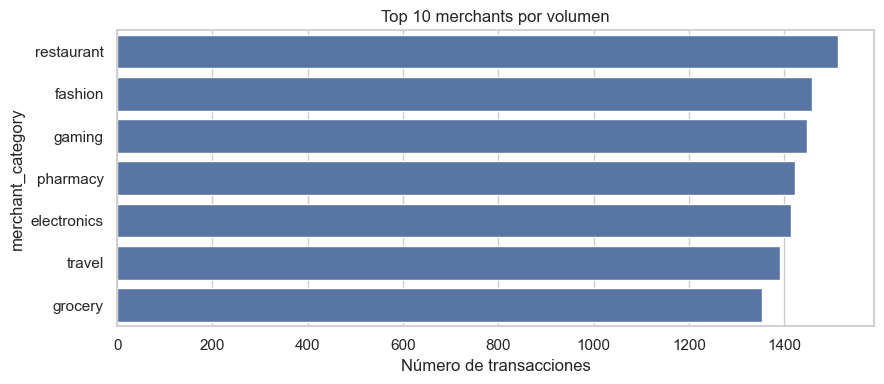

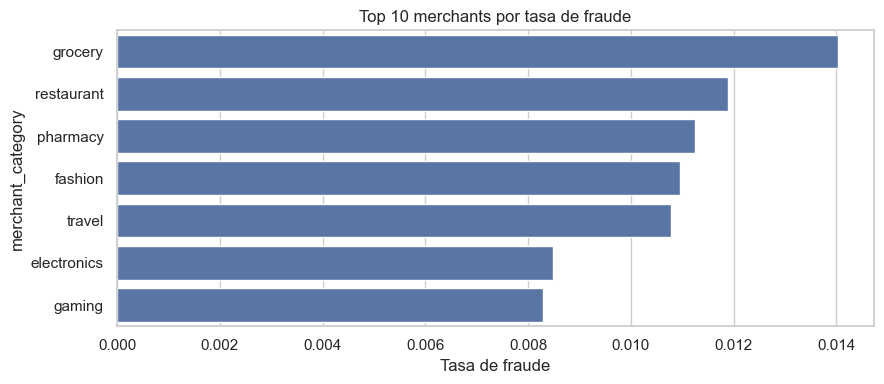

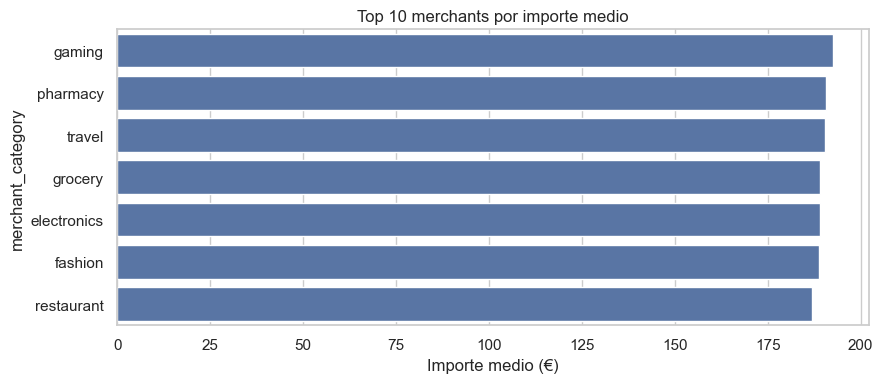

In [696]:
topN = 10

# Volumen
top_vol = res_merchant_f.sort_values("n", ascending=False).head(topN)
plt.figure(figsize=(9, 4))
sns.barplot(x="n", y="merchant_category", data=top_vol)
plt.title(f"Top {topN} merchants por volumen")
plt.xlabel("Número de transacciones")
plt.ylabel("merchant_category")
plt.tight_layout()
plt.show()

# Tasa de fraude
top_fraud = res_merchant_f.sort_values("fraud_rate", ascending=False).head(topN)
plt.figure(figsize=(9, 4))
sns.barplot(x="fraud_rate", y="merchant_category", data=top_fraud)
plt.title(f"Top {topN} merchants por tasa de fraude")
plt.xlabel("Tasa de fraude")
plt.ylabel("merchant_category")
plt.tight_layout()
plt.show()

# Importe medio
top_amount = res_merchant_f.sort_values("amount_mean", ascending=False).head(topN)
plt.figure(figsize=(9, 4))
sns.barplot(x="amount_mean", y="merchant_category", data=top_amount)
plt.title(f"Top {topN} merchants por importe medio")
plt.xlabel("Importe medio (€)")
plt.ylabel("merchant_category")
plt.tight_layout()
plt.show()


## 📊 Análisis por tipo de comercio (`merchant_category`)

### 🔹 Resumen general

- Se identifican **7 categorías de comercio** en el dataset:
  `restaurant`, `fashion`, `gaming`, `pharmacy`, `electronics`, `travel`, y `grocery`.
- No hay valores nulos en esta columna (`merchant_category`).
- El volumen de transacciones está bien distribuido entre las categorías, oscilando entre **1350 y 1510 operaciones por categoría**.
- Las tasas de fraude se mantienen **bajas y estables (~1%)**, sin grandes diferencias entre sectores.
- Los **importes medios** son bastante homogéneos, situándose alrededor de **190 €**, lo que sugiere un rango de gasto similar entre tipos de comercio.
- El **riesgo medio (`risk_score_mean`)** también es consistente entre categorías, en torno a **0.50–0.52**, sin picos destacables.

### 🔹 Principales observaciones

- **Mayor volumen:**  
  Los sectores con mayor número de transacciones son `restaurant`, `fashion` y `gaming`, cada uno con más de **1400 operaciones**.  
  Estos tres concentran aproximadamente el **45 % del total de transacciones** del dataset.

- **Tasa de fraude:**  
  Aunque las diferencias son pequeñas, los sectores con una **ligeramente mayor tasa de fraude** son:
  - `grocery` (~1.4 %)  
  - `restaurant` (~1.3 %)  
  Estas categorías pueden reflejar **operaciones de menor ticket y alta recurrencia**, que tienden a generar más disputas o errores de cargo.

- **Importe medio:**  
  Los comercios de `gaming`, `pharmacy` y `travel` presentan los **importes medios más elevados**, alrededor de **190–193 €**.  
  Esto podría indicar operaciones unitarias más grandes o menos frecuentes, coherente con patrones de compra por ocio o servicios específicos.

- **Riesgo medio:**  
  No hay diferencias estadísticamente relevantes, aunque `fashion`, `gaming` y `electronics` concentran valores de `risk_score_mean` ligeramente superiores (0.52).  
  Esto podría reflejar que los modelos de scoring asignan un **nivel de riesgo uniforme** entre categorías en este dataset.

### 🔹 Conclusiones y recomendaciones

- El tipo de comercio **no parece un factor aislado de alto riesgo**, aunque puede aportar **contexto útil al combinarlo con variables geográficas o de importe**.
- La homogeneidad sugiere que el fraude **se distribuye de forma transversal entre sectores**, posiblemente más influido por **país, canal de pago o score de riesgo** que por categoría de comercio.
- Se recomienda:
  1. Incorporar `merchant_category` como **feature categórica** en el modelado supervisado (one-hot o target encoding).  
  2. Analizar interacciones entre `merchant_category` y variables como `is_international` o `region_normalized` para detectar **comportamientos anómalos locales**.  
  3. En el dashboard de Power BI, incluir una visual comparativa de **tasa de fraude y volumen por categoría**, con opción de filtrar por país o score.

> En resumen, el análisis confirma que el dataset tiene una buena cobertura sectorial, sin sesgos aparentes ni concentraciones excesivas, lo que facilita el uso de `merchant_category` como variable explicativa robusta en fases posteriores del proyecto.
